In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data and remove unnecessary header rows
cyto_assay = pd.read_csv('data/AID_1851_datatable_all.csv', skipinitialspace=True, header=[0,4])

In [3]:
# Drop the bottom level of the multi-index
cyto_assay.columns = cyto_assay.columns.droplevel(1)

In [4]:
cyto_assay.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Inhibition Observed,Approved Drug,Collection,...,Activity at 11.43 uM,Activity at 25.56 uM,Activity at 57.14 uM,Activity at 0.00164 uM,Activity at 0.00366 uM,Activity at 0.00818 uM,Compound QC,Panel ID,Panel Name,Panel Target
0,1,842238,6602638.0,Inactive,NaN,NaN,NaN,True,Biodiverse,NaN,...,8.1486,NaN,-15.6281,NaN,NaN,NaN,QC'd by DPISMR,1,p450-cyp2c19,NP_000760.1
1,2,842238,6602638.0,Inconclusive,NaN,NaN,NaN,True,Biodiverse,NaN,...,-8.5062,NaN,-37.6308,NaN,NaN,NaN,QC'd by DPISMR,2,p450-cyp2d6,NP_001020332.1
2,3,842238,6602638.0,Inactive,NaN,NaN,NaN,True,Biodiverse,NaN,...,0.4027,NaN,-2.2935,NaN,-1.3363,NaN,QC'd by DPISMR,3,p450-cyp3a4,NP_059488.2
3,4,842238,6602638.0,Inactive,NaN,NaN,NaN,True,Biodiverse,NaN,...,-7.3920,NaN,-11.9048,NaN,NaN,NaN,QC'd by DPISMR,4,p450-cyp1a2,NP_000752.2
4,5,842238,6602638.0,Inconclusive,NaN,NaN,NaN,True,Biodiverse,NaN,...,-41.7035,NaN,-10.7694,NaN,NaN,NaN,QC'd by DPISMR,5,p450-cyp2c9,NP_000762.2


In [5]:
cyto_assay.isnull().sum()

PUBCHEM_RESULT_TAG               0
PUBCHEM_SID                      0
PUBCHEM_CID                    110
PUBCHEM_ACTIVITY_OUTCOME         0
PUBCHEM_ACTIVITY_SCORE       85715
PUBCHEM_ACTIVITY_URL         85715
PUBCHEM_ASSAYDATA_COMMENT    85715
Inhibition Observed              0
Approved Drug                    0
Collection                   80145
Analysis Comment             85715
Activity Score                   0
Potency                      45031
Curve_Description            42460
Fit_LogAC50                  42606
Fit_HillSlope                42606
Fit_R2                       42606
Fit_InfiniteActivity         42606
Fit_ZeroActivity             42606
Fit_CurveClass                   0
Excluded_Points              42606
Max_Response                     0
Activity at 0.0007 uM        58389
Activity at 0.00160 uM       73752
Activity at 0.00368 uM       20779
Activity at 0.00820 uM       73638
Activity at 0.018 uM          1556
Activity at 0.041 uM         71654
Activity at 0.091 uM

In [6]:
cyto_assay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85715 entries, 0 to 85714
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PUBCHEM_RESULT_TAG         85715 non-null  int64  
 1   PUBCHEM_SID                85715 non-null  int64  
 2   PUBCHEM_CID                85605 non-null  float64
 3   PUBCHEM_ACTIVITY_OUTCOME   85715 non-null  object 
 4   PUBCHEM_ACTIVITY_SCORE     0 non-null      float64
 5   PUBCHEM_ACTIVITY_URL       0 non-null      float64
 6   PUBCHEM_ASSAYDATA_COMMENT  0 non-null      float64
 7   Inhibition Observed        85715 non-null  bool   
 8   Approved Drug              85715 non-null  object 
 9   Collection                 5570 non-null   object 
 10  Analysis Comment           0 non-null      float64
 11  Activity Score             85715 non-null  int64  
 12  Potency                    40684 non-null  float64
 13  Curve_Description          43255 non-null  obj

In [7]:
cyto_assay['Inhibition Observed'].unique()

array([ True, False])

In [8]:
type(cyto_assay['Inhibition Observed'].items)

method

In [9]:
cyto_assay['Inhibition Observed'] = cyto_assay['Inhibition Observed'].map({True:1, False:0}).astype(int)

In [10]:
# pd.to_numeric(cyto_assay['Inhibition Observed'], errors='coerce')

In [11]:
cyto_assay['Inhibition Observed'].unique()

array([1, 0])

In [12]:
cyto_assay_corr = (cyto_assay.corr()[['Inhibition Observed']].sort_values(by='Inhibition Observed', ascending=False))
cyto_assay_corr

,Inhibition Observed
Inhibition Observed,1.000000e+00
Activity Score,2.915571e-01
Activity at 0.00366 uM,7.033316e-02
Activity at 0.00164 uM,6.621039e-02
PUBCHEM_SID,5.134221e-02
PUBCHEM_RESULT_TAG,3.583945e-02
Activity at 0.00368 uM,3.316173e-02
Activity at 0.0007 uM,2.891249e-02
Activity at 0.018 uM,2.753763e-02
Activity at 0.00820 uM,1.995518e-02


In [13]:
cyto_assay.isnull().sum()

PUBCHEM_RESULT_TAG               0
PUBCHEM_SID                      0
PUBCHEM_CID                    110
PUBCHEM_ACTIVITY_OUTCOME         0
PUBCHEM_ACTIVITY_SCORE       85715
PUBCHEM_ACTIVITY_URL         85715
PUBCHEM_ASSAYDATA_COMMENT    85715
Inhibition Observed              0
Approved Drug                    0
Collection                   80145
Analysis Comment             85715
Activity Score                   0
Potency                      45031
Curve_Description            42460
Fit_LogAC50                  42606
Fit_HillSlope                42606
Fit_R2                       42606
Fit_InfiniteActivity         42606
Fit_ZeroActivity             42606
Fit_CurveClass                   0
Excluded_Points              42606
Max_Response                     0
Activity at 0.0007 uM        58389
Activity at 0.00160 uM       73752
Activity at 0.00368 uM       20779
Activity at 0.00820 uM       73638
Activity at 0.018 uM          1556
Activity at 0.041 uM         71654
Activity at 0.091 uM

In [14]:
features = cyto_assay.select_dtypes(include=['float64','int64'])

X = features
y = 'Inhibition Observed'

In [15]:
cyto_assay['Approved Drug'].unique()

array(['Biodiverse', 'Exploratory'], dtype=object)

In [16]:
cyto_assay['Approved Drug'] = cyto_assay['Approved Drug'].replace({'Biodiverse':'1', 'Exploratory':'0'}).astype(float)

In [17]:
cyto_assay['Compound QC'].unique()

array(["QC'd by DPISMR", "QC'd by Pharmacopeia", "QC'd by NCI",
       "QC'd by Prestwick", "QC'd by SigmaAldrich", "QC'd by Tocris",
       "QC'd by UPCMLD", "QC'd by ChemBridge", "QC'd by BUCMLD"],
      dtype=object)

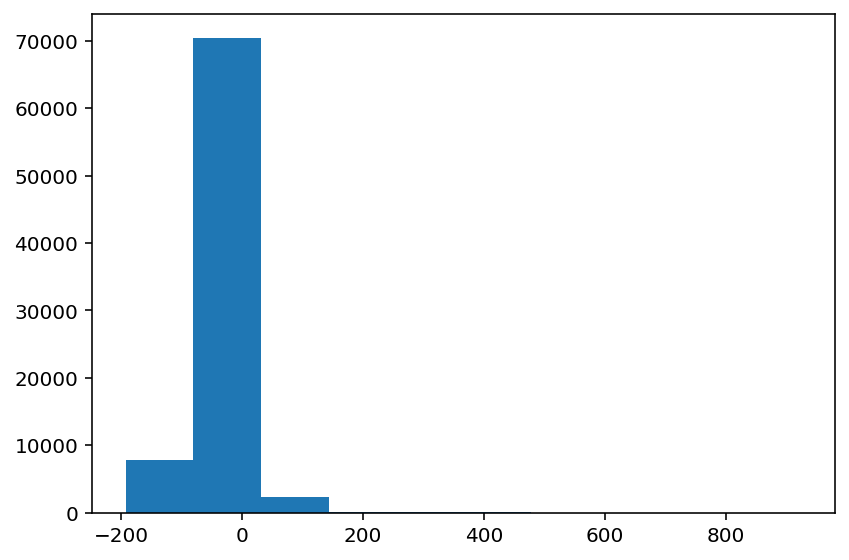

In [18]:
plt.hist(cyto_assay['Activity at 11.43 uM'])
plt.tight_layout();

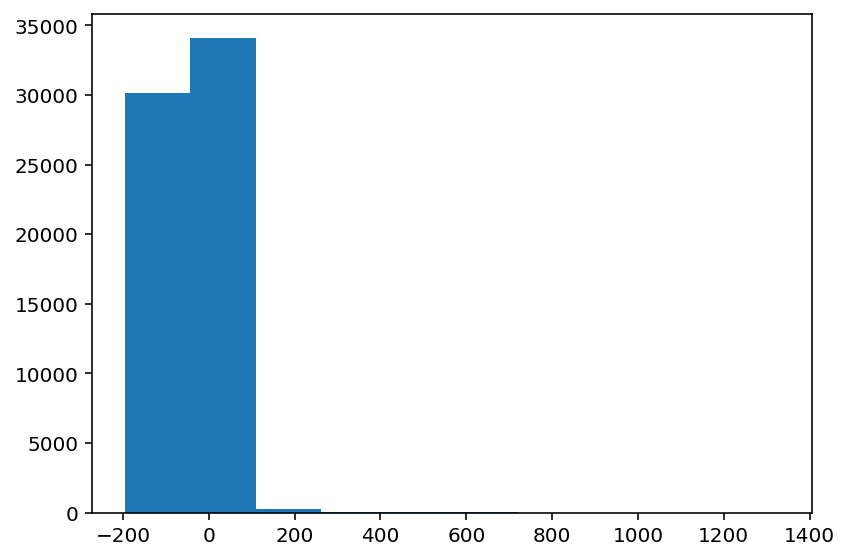

In [19]:
plt.hist(cyto_assay['Activity at 57.14 uM'])
plt.tight_layout();

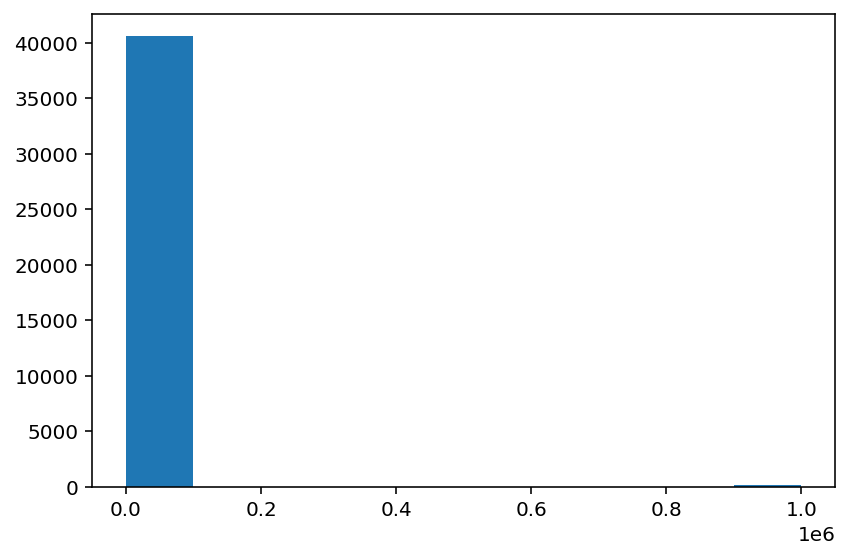

In [20]:
plt.hist(cyto_assay['Potency'])
plt.tight_layout();

In [21]:
cyp2c19 =  cyto_assay['Panel Name'] != 'p450-cyp2c19'

In [22]:
cyp2c19_df = pd.read_pickle("data/cyp2c19.pkl")
cyp2c9_df = pd.read_pickle("data/cyp2c9.pkl")
cyp1a2_df = pd.read_pickle("data/cyp1a2.pkl")
cyp2d6_df = pd.read_pickle("data/cyp2d6.pkl")
cyp3a4_df = pd.read_pickle("data/cyp3a4.pkl")

In [23]:
X = cyp2c19_df.drop(columns=['PUBCHEM_ACTIVITY_OUTCOME', 'Inhibition Observed'], axis=1)
y = cyp2c19_df['Inhibition Observed']

In [24]:
X.head()

,index,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,5,1,1,1,0,1,1,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1,10,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,1,0,0,1,0
2,15,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,0,0
3,20,0,0,0,0,0,1,0,1,1,...,1,0,1,1,1,0,0,1,0,1
4,25,1,1,1,1,1,0,0,0,1,...,0,1,1,0,1,1,0,1,0,1


## Feature Importance

Automatically created module for IPython interactive environment
1. feature 0 (0.029288)
2. feature 54 (0.018357)
3. feature 28 (0.018053)
4. feature 26 (0.017984)
5. feature 13 (0.017855)
6. feature 43 (0.017687)
7. feature 5 (0.017638)
8. feature 25 (0.017630)
9. feature 15 (0.017562)
10. feature 9 (0.017558)
11. feature 64 (0.017467)
12. feature 45 (0.017367)
13. feature 12 (0.017347)
14. feature 4 (0.017273)
15. feature 47 (0.017253)
16. feature 2 (0.017226)
17. feature 32 (0.017201)
18. feature 33 (0.017155)
19. feature 36 (0.017087)
20. feature 7 (0.017021)
21. feature 57 (0.017009)
22. feature 38 (0.016948)
23. feature 20 (0.016937)
24. feature 21 (0.016901)
25. feature 50 (0.016871)
26. feature 41 (0.016861)
27. feature 16 (0.016836)
28. feature 6 (0.016697)
29. feature 46 (0.016680)
30. feature 8 (0.016667)
31. feature 14 (0.016619)
32. feature 42 (0.016540)
33. feature 27 (0.016533)
34. feature 22 (0.016450)
35. feature 55 (0.016422)
36. feature 44 (0.016199)
37. feature 63 (

<Figure size 432x288 with 0 Axes>

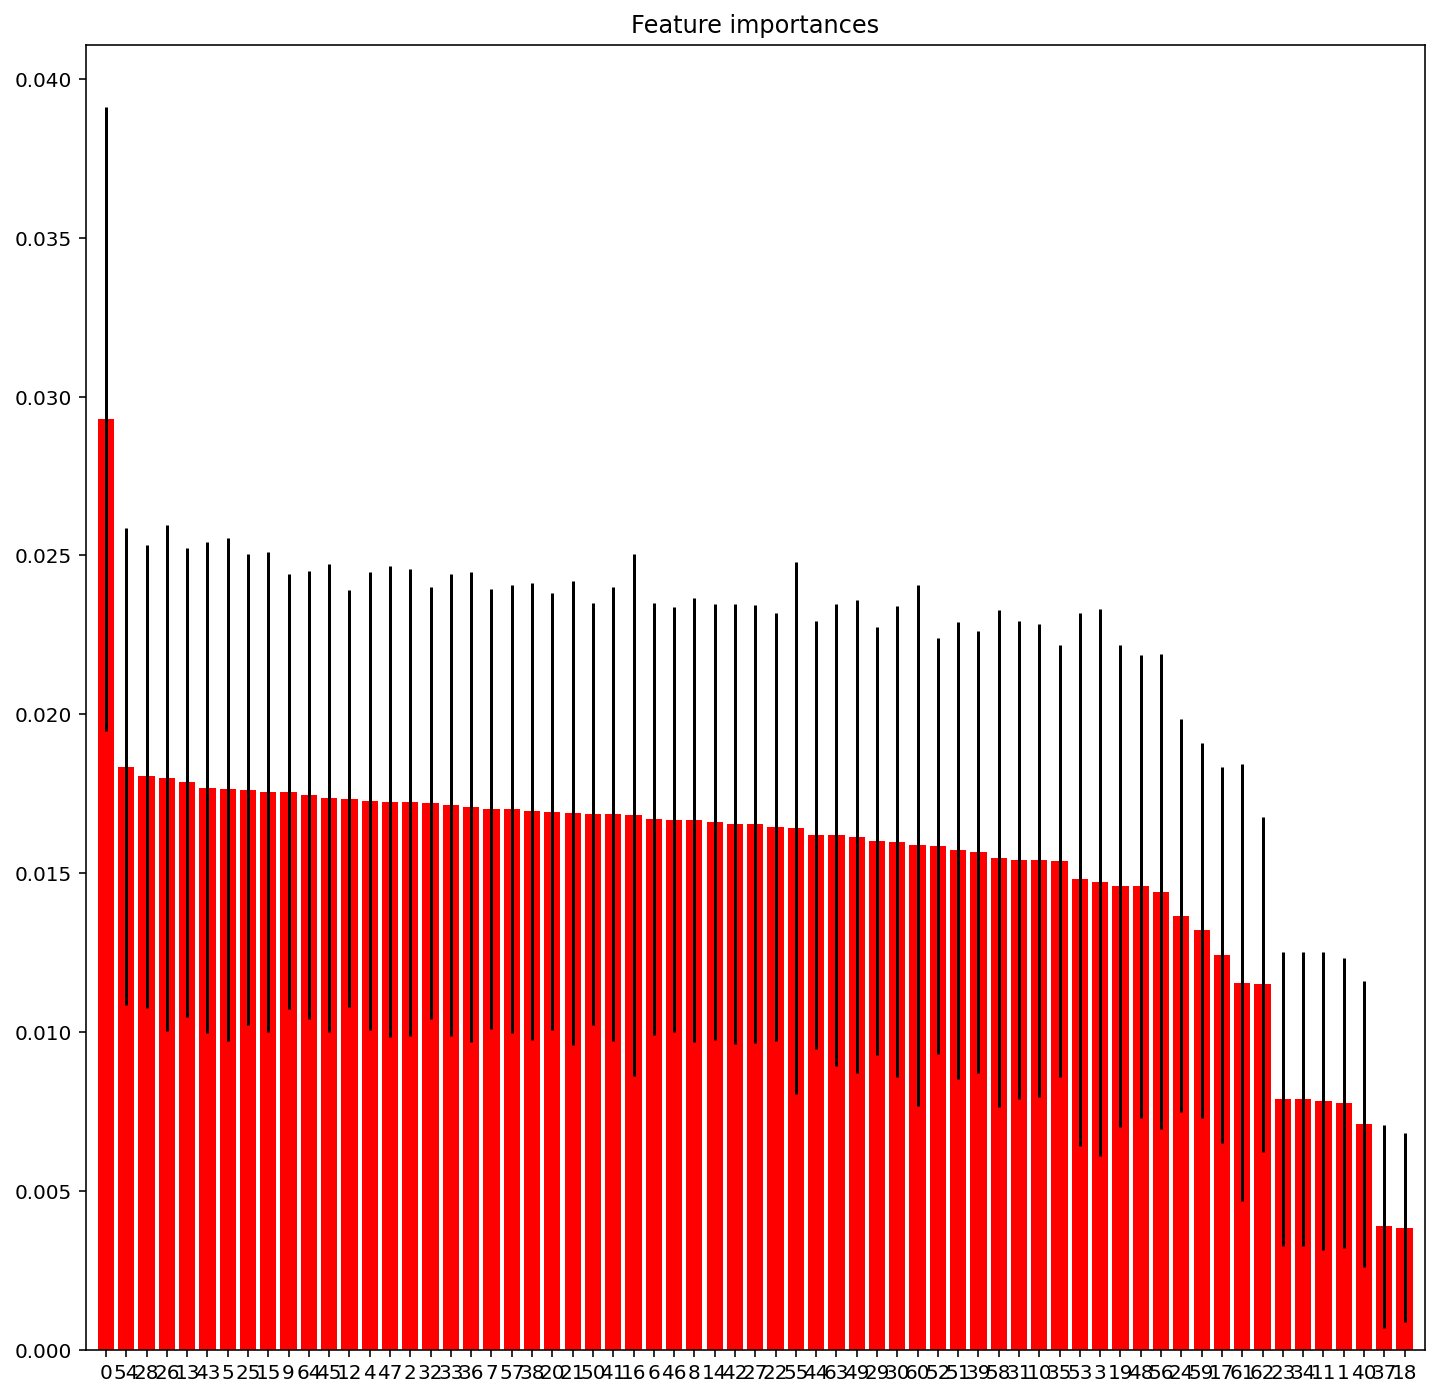

In [25]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 128 Bit cyp2c19_df

In [26]:
cyp2c19_128_df = pd.read_pickle("data/cyp2c19_128.pkl")

In [27]:
X = cyp2c19_128_df.drop(columns=['PUBCHEM_ACTIVITY_OUTCOME', 'Inhibition Observed'], axis=1)
y = cyp2c19_128_df['Inhibition Observed']

Automatically created module for IPython interactive environment


<Figure size 432x288 with 0 Axes>

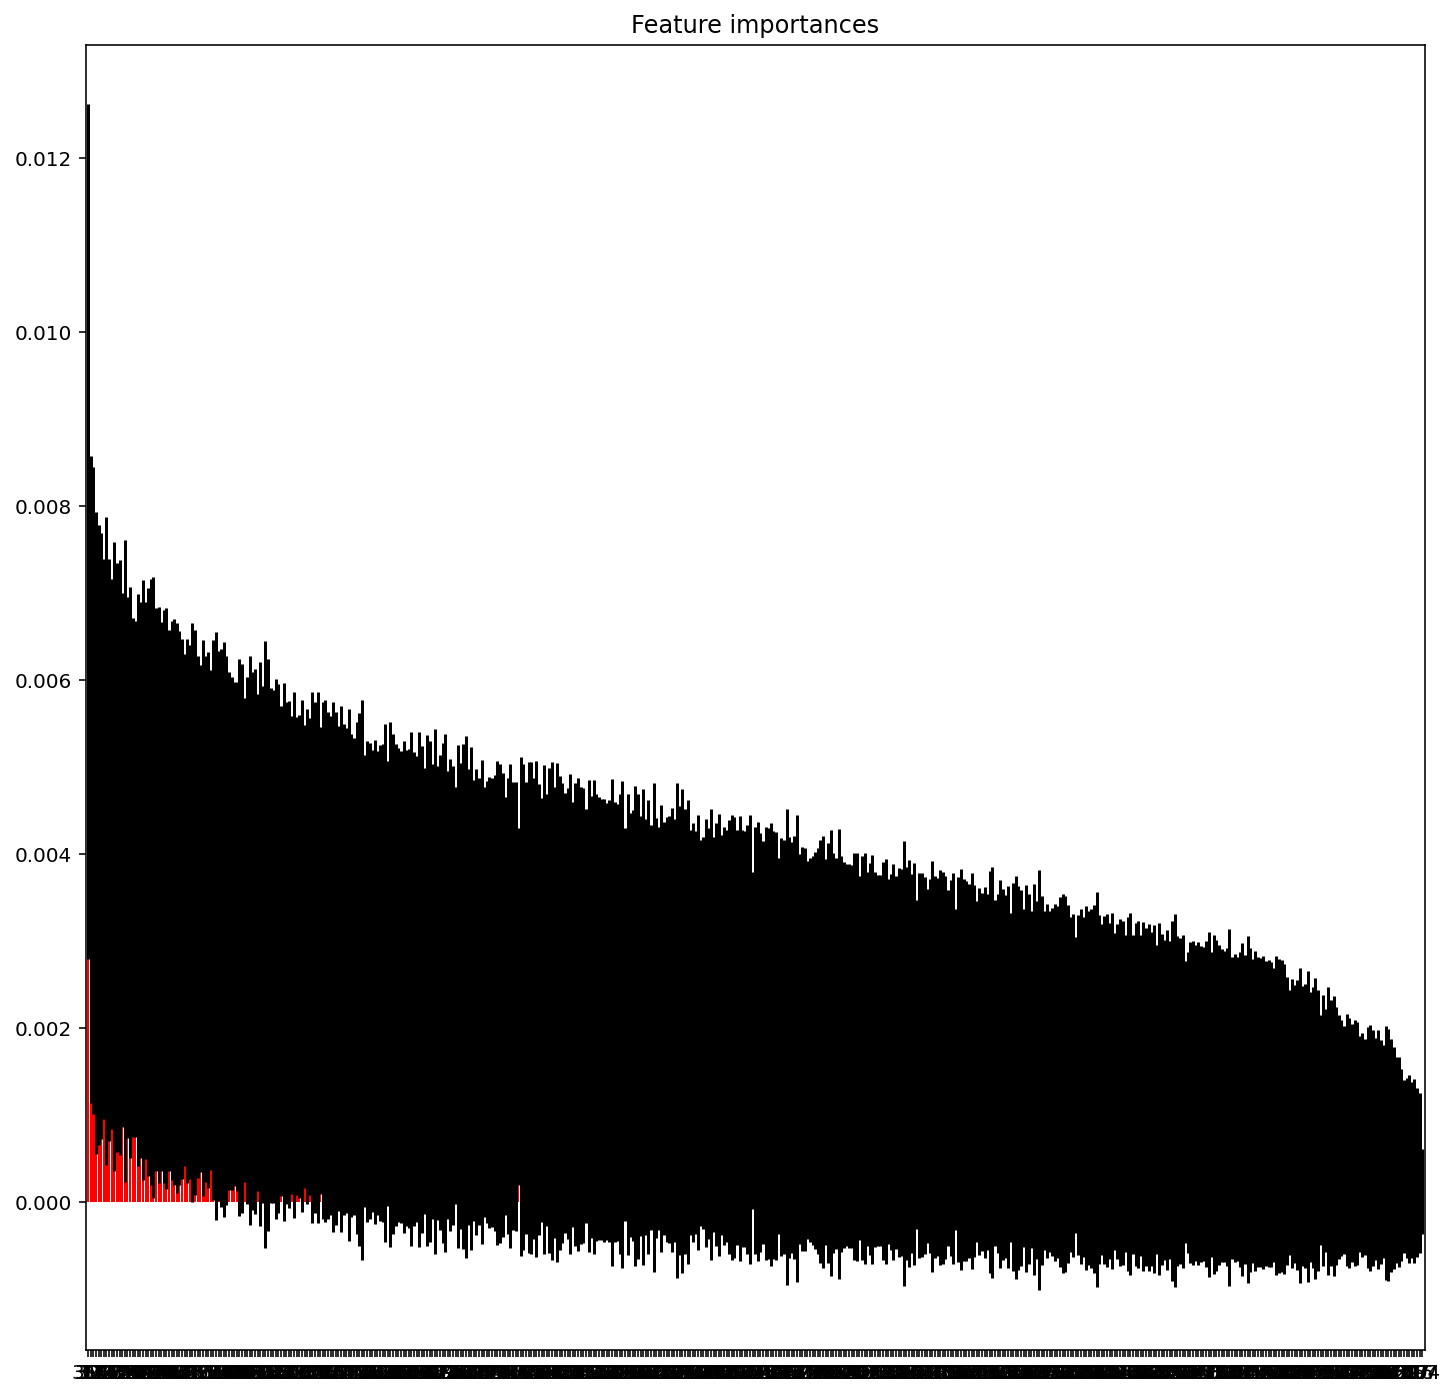

In [28]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 512 bit

In [29]:
cyp2c19_128_df = pd.read_pickle("data/cyp2c19_128.pkl")

In [30]:
X = cyp2c19_128_df.drop(columns=['PUBCHEM_ACTIVITY_OUTCOME', 'Inhibition Observed'], axis=1)
y = cyp2c19_128_df['Inhibition Observed']

Automatically created module for IPython interactive environment


<Figure size 432x288 with 0 Axes>

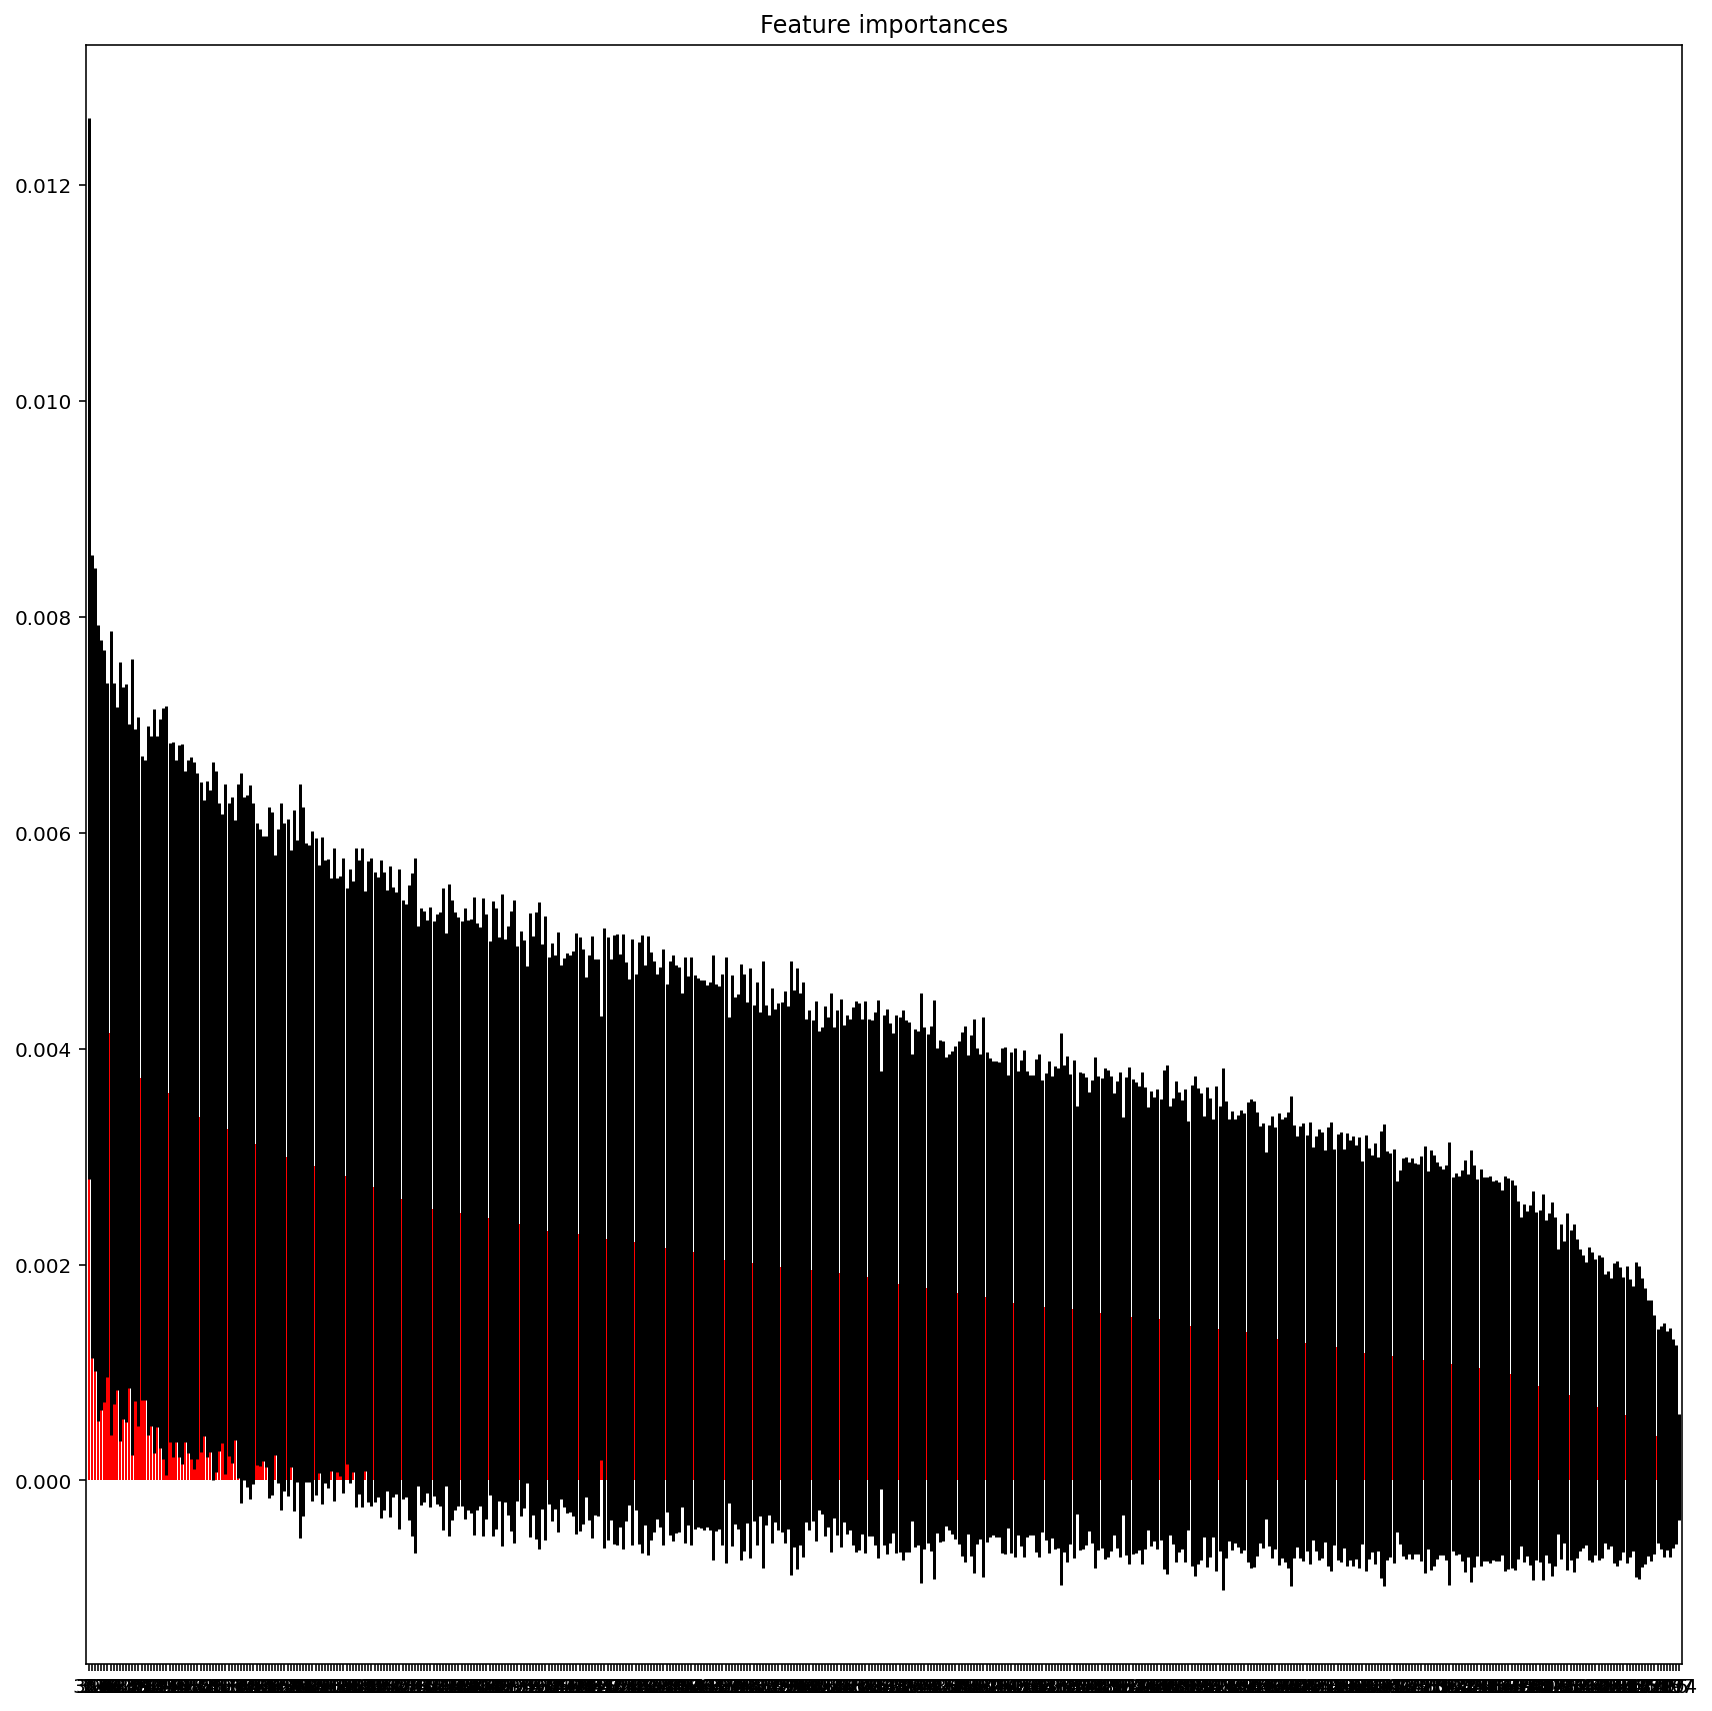

In [40]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show();

## More is not better - on to Swiss Features

In [41]:
# This is on the full data set (not broken down by enzyme yet)
swiss_feat_test = pd.read_csv('data/swiss_feat_test.csv')

In [42]:
swiss_feat_test.head()

,level_0,index,h_bond_donors,h_bond_acceptors,molar_refractivity,molecular_weight,n_atoms,n_carbons,n_heteroatoms,n_rings,...,tpsa,n_heavy_atoms,n_aromatic_atom,single_bond,double_bond,triple_bond,aromatic_bond,CYP,Inhibition Observed,Panel Name
0,0,0,1.0,4.0,70.4422,306.995639,18.0,12.0,6.0,2.0,...,67.49,18.0,11.0,12.0,4.0,0.0,22.0,0,1,p450-cyp2c19
1,1,1,1.0,4.0,85.0662,290.116761,22.0,17.0,5.0,3.0,...,59.28,22.0,17.0,10.0,4.0,0.0,34.0,2,1,p450-cyp2d6
2,2,2,1.0,3.0,85.8431,298.131742,22.0,17.0,5.0,2.0,...,72.24,22.0,12.0,18.0,4.0,0.0,24.0,4,1,p450-cyp3a4
3,3,3,1.0,1.0,59.1017,209.121592,15.0,12.0,3.0,1.0,...,29.10,15.0,6.0,16.0,2.0,0.0,12.0,3,1,p450-cyp1a2
4,4,4,1.0,5.0,72.2607,269.080041,20.0,14.0,6.0,3.0,...,73.34,20.0,12.0,16.0,4.0,0.0,24.0,1,1,p450-cyp2c9


In [43]:
# X = swiss_feat_df.drop(columns=['index', 'Inhibition Observed'], axis=1)
# y = swiss_feat_df['Inhibition Observed']

In [44]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

def plot_swiss_feat_importance(swiss_feat):
    
    X = swiss_feat.drop(columns=['index', 'Inhibition Observed'], axis=1)
    y = swiss_feat['Inhibition Observed']

    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
#     print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.figure(figsize = (12,12))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    return plt.show();

Automatically created module for IPython interactive environment


## Swiss Features by enzyme

### CYP 2c19

In [45]:
cyp2c19_swiss_feat = pd.read_pickle('data/cyp2c19_swiss_feat.pkl')

1. feature 9 (0.084332)
2. feature 2 (0.077380)
3. feature 3 (0.077064)
4. feature 10 (0.076192)
5. feature 8 (0.071013)
6. feature 13 (0.066100)
7. feature 1 (0.064344)
8. feature 5 (0.061877)
9. feature 6 (0.060082)
10. feature 11 (0.056194)
11. feature 4 (0.054088)
12. feature 14 (0.052744)
13. feature 0 (0.049210)
14. feature 12 (0.046785)
15. feature 16 (0.044152)
16. feature 7 (0.041550)
17. feature 15 (0.016891)


<Figure size 432x288 with 0 Axes>

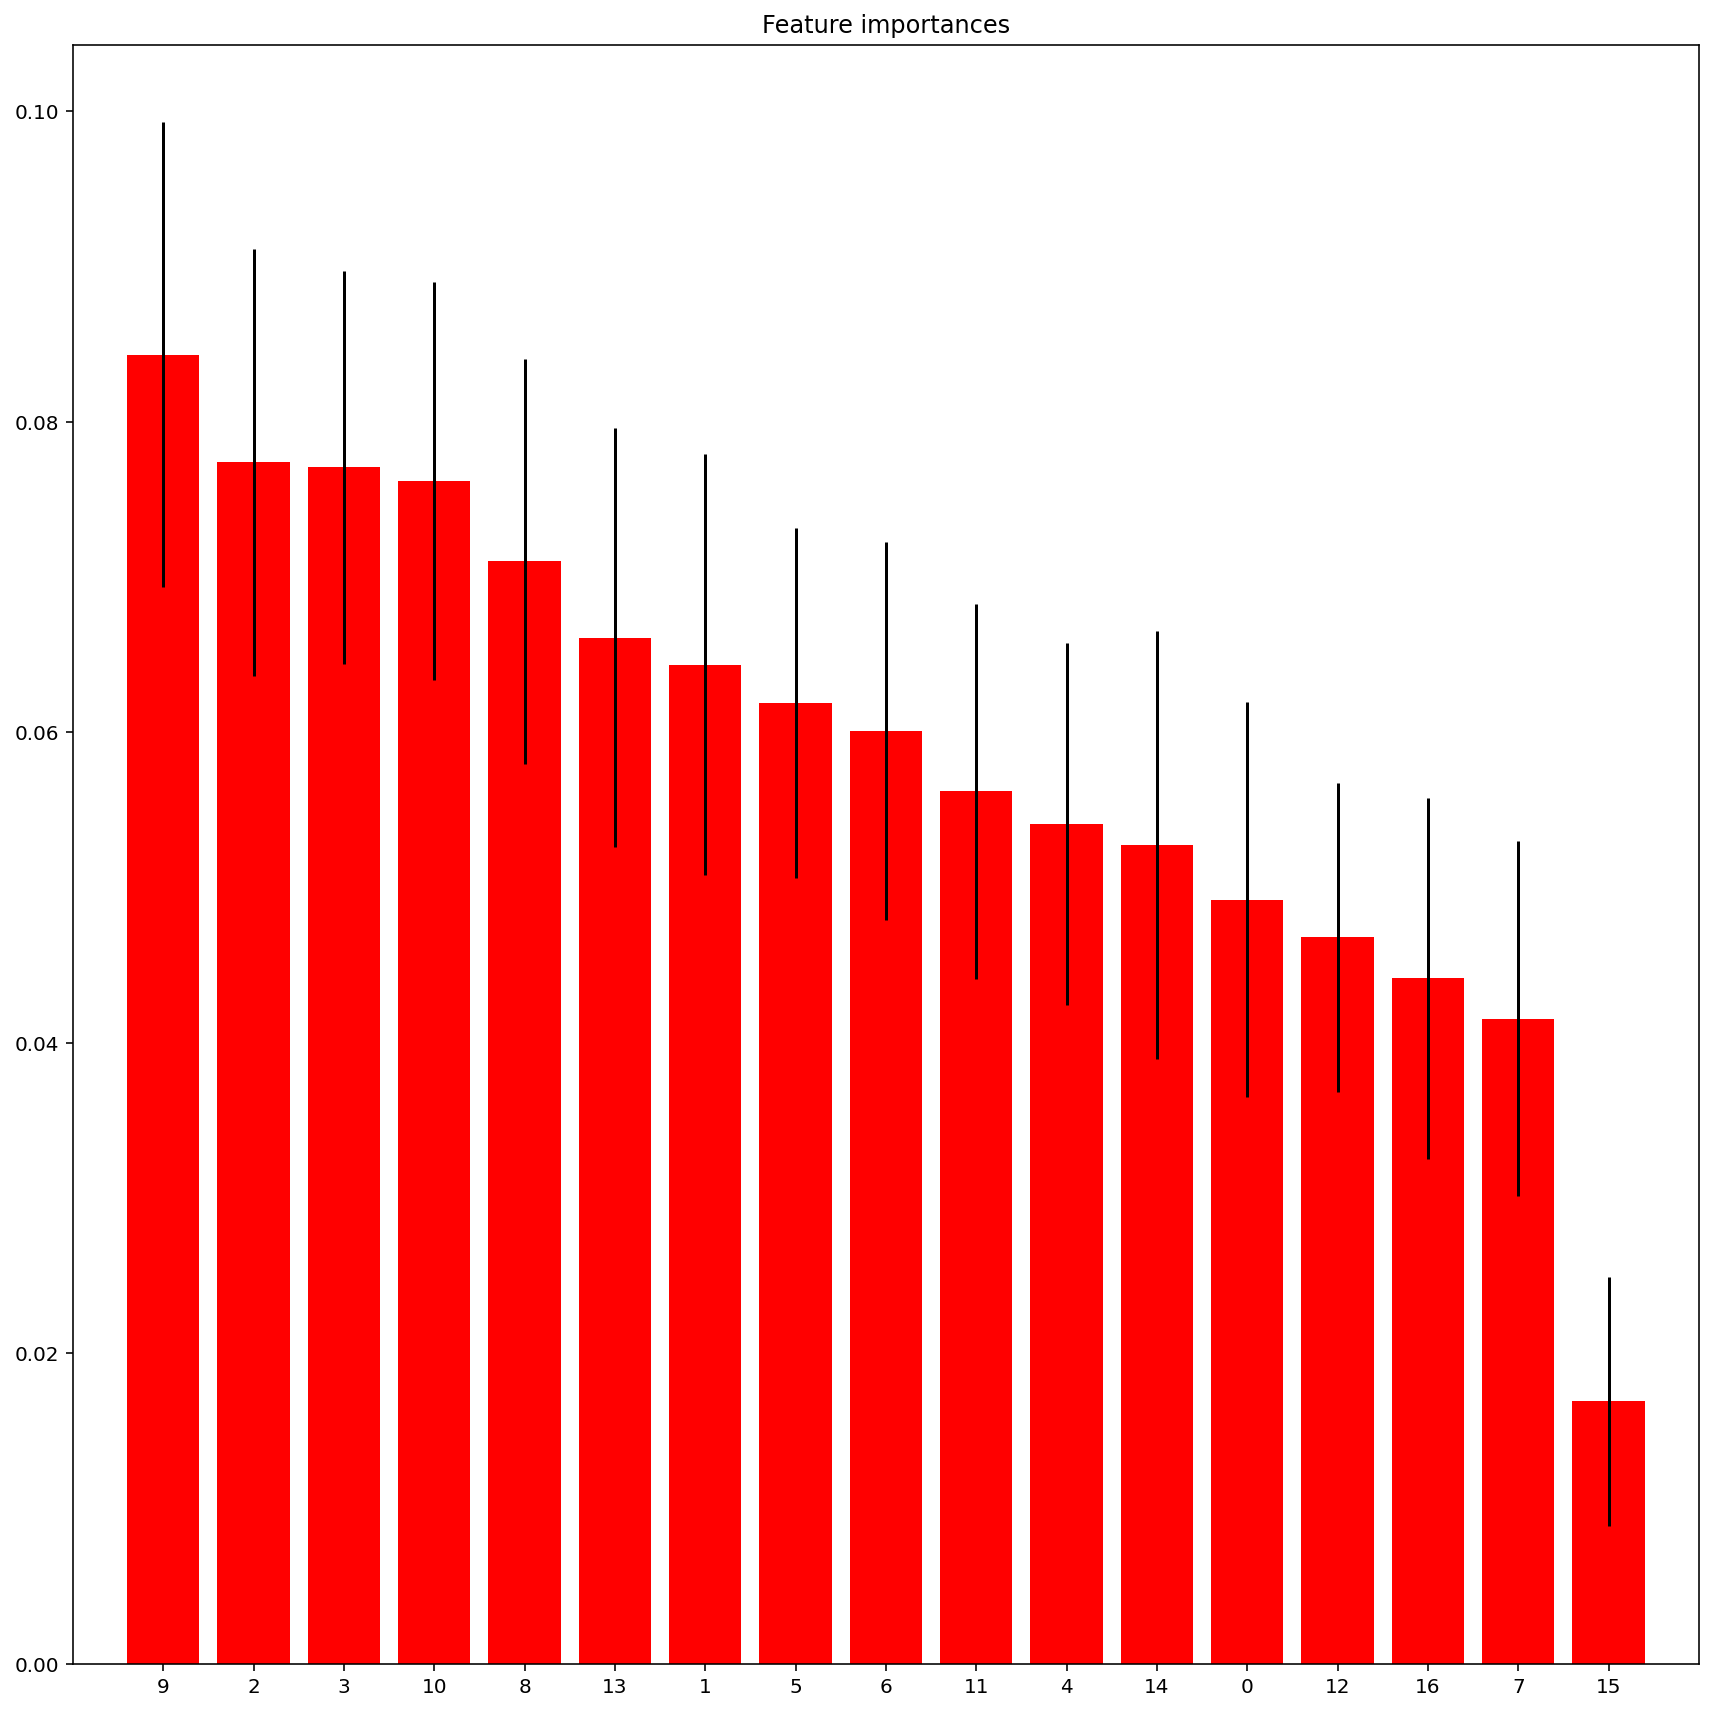

In [46]:
cyp2c19_swiss_feat_imp = plot_swiss_feat_importance(cyp2c19_swiss_feat)

### CYP2c9

In [53]:
cyp2c9_swiss_feat = pd.read_pickle('data/cyp2c9_swiss_feat.pkl')

1. feature 10 (0.083628)
2. feature 3 (0.080952)
3. feature 11 (0.077962)
4. feature 4 (0.075789)
5. feature 9 (0.066121)
6. feature 14 (0.064815)
7. feature 2 (0.062968)
8. feature 6 (0.062947)
9. feature 7 (0.059052)
10. feature 5 (0.055287)
11. feature 12 (0.055111)
12. feature 15 (0.052190)
13. feature 1 (0.051216)
14. feature 13 (0.050612)
15. feature 17 (0.047707)
16. feature 8 (0.043586)
17. feature 16 (0.010057)
18. feature 0 (0.000000)


<Figure size 432x288 with 0 Axes>

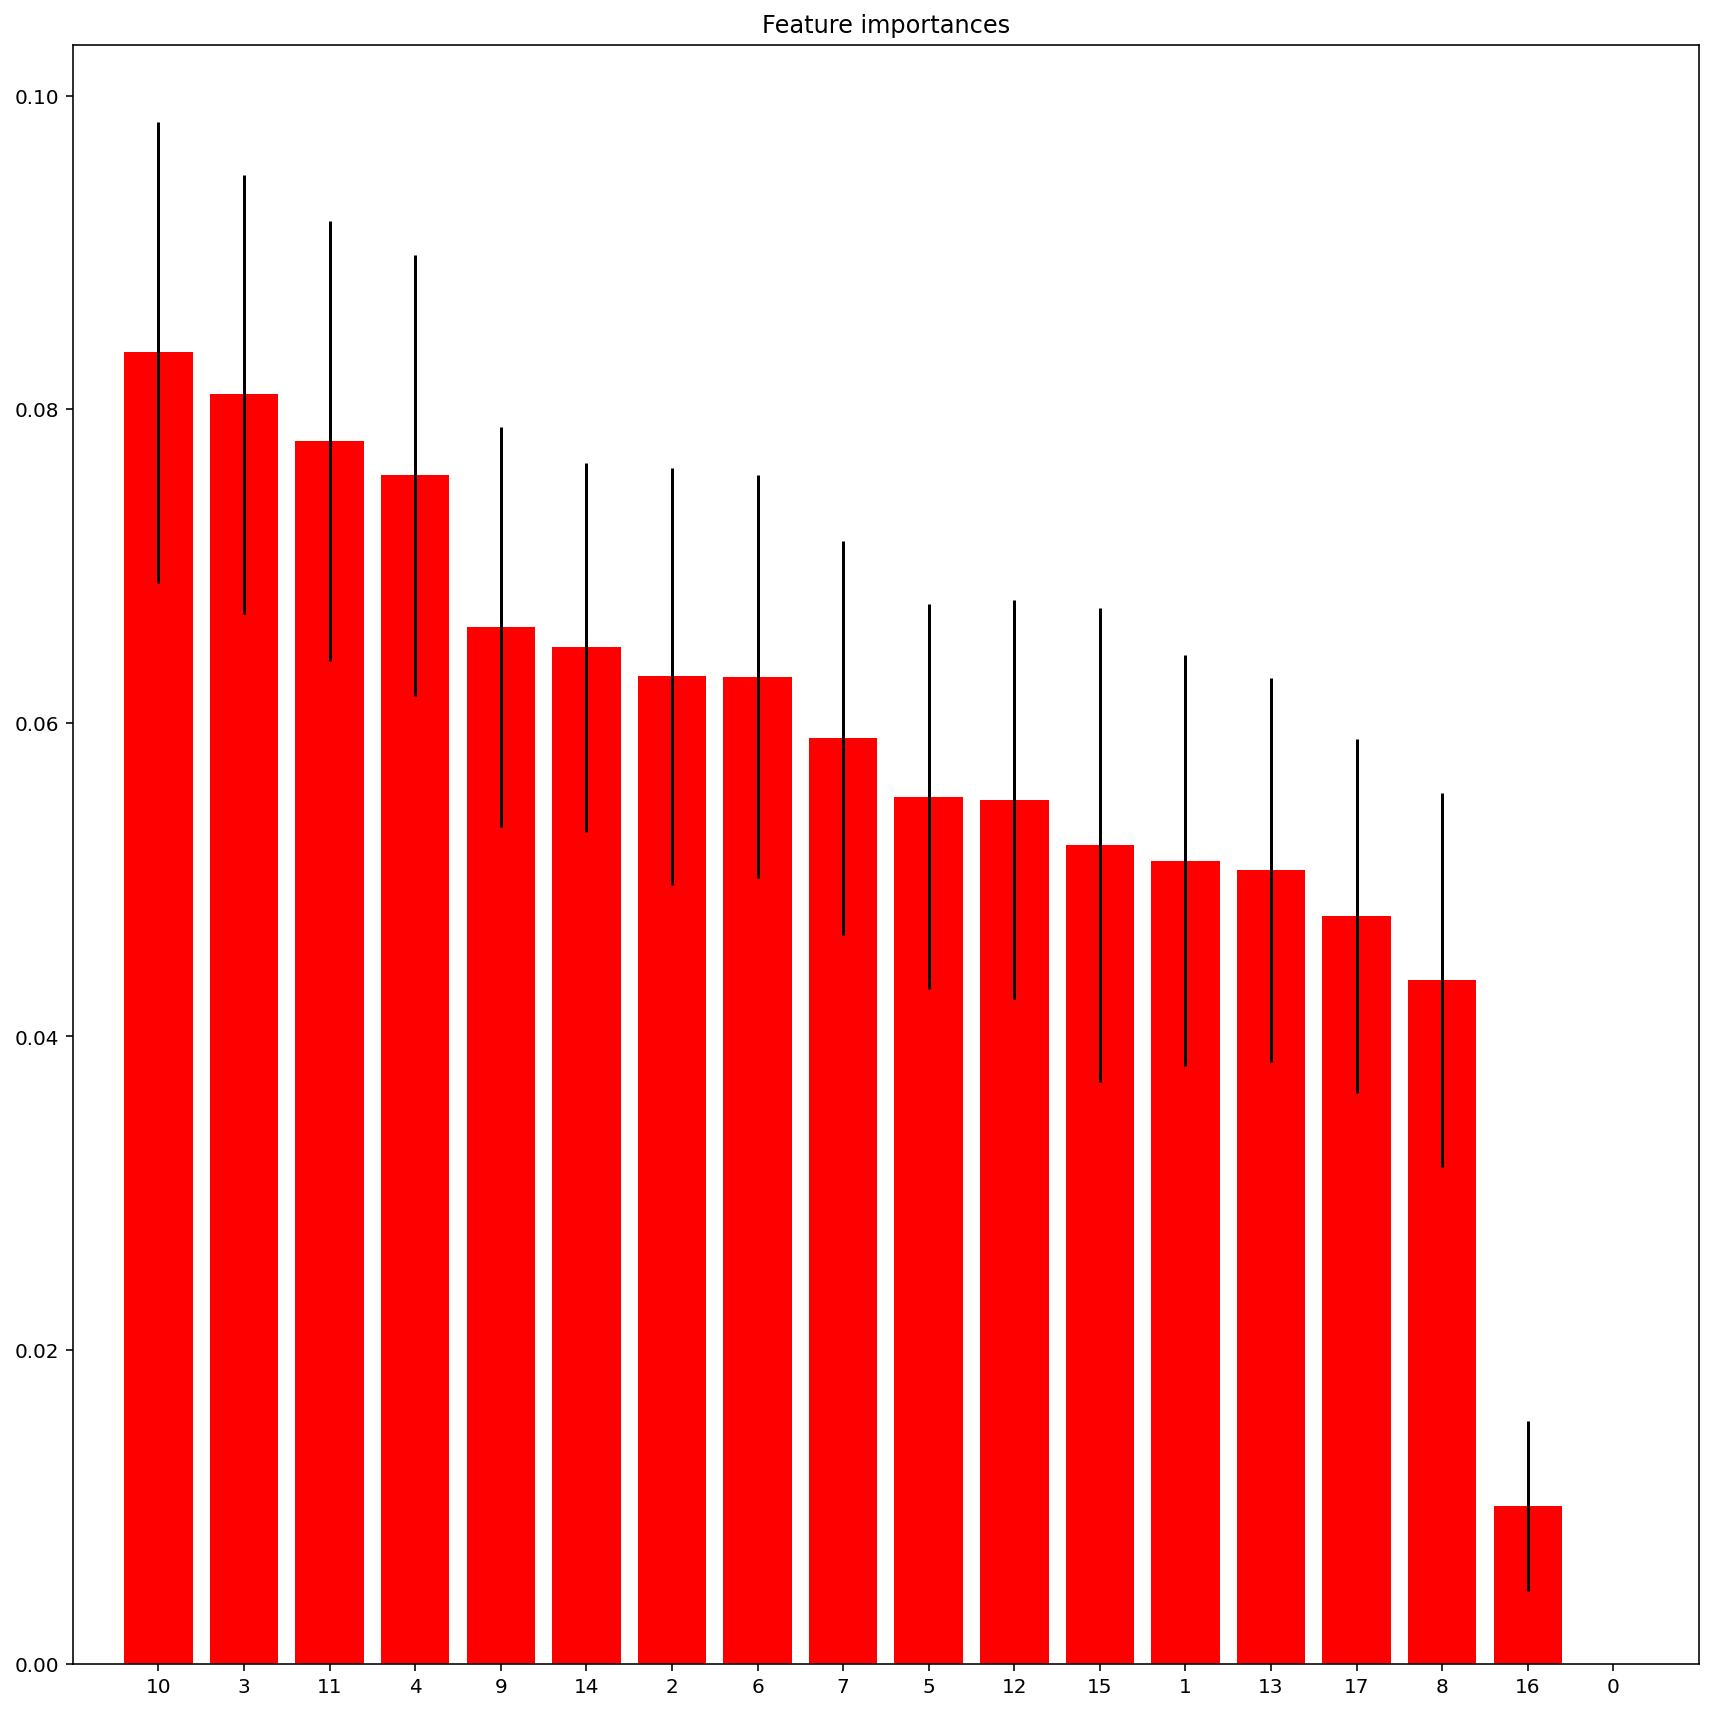

In [54]:
cyp2c9_swiss_feat_imp = plot_swiss_feat_importance(cyp2c9_swiss_feat)

### CYP1a2

In [55]:
cyp1a2_swiss_feat = pd.read_pickle('data/cyp1a2_swiss_feat.pkl')

1. feature 10 (0.081903)
2. feature 4 (0.079637)
3. feature 3 (0.079220)
4. feature 11 (0.079110)
5. feature 9 (0.067575)
6. feature 14 (0.065673)
7. feature 6 (0.062886)
8. feature 7 (0.060811)
9. feature 2 (0.059810)
10. feature 15 (0.055706)
11. feature 5 (0.054045)
12. feature 12 (0.052792)
13. feature 13 (0.049482)
14. feature 1 (0.046684)
15. feature 17 (0.046259)
16. feature 8 (0.043874)
17. feature 16 (0.014535)
18. feature 0 (0.000000)


<Figure size 432x288 with 0 Axes>

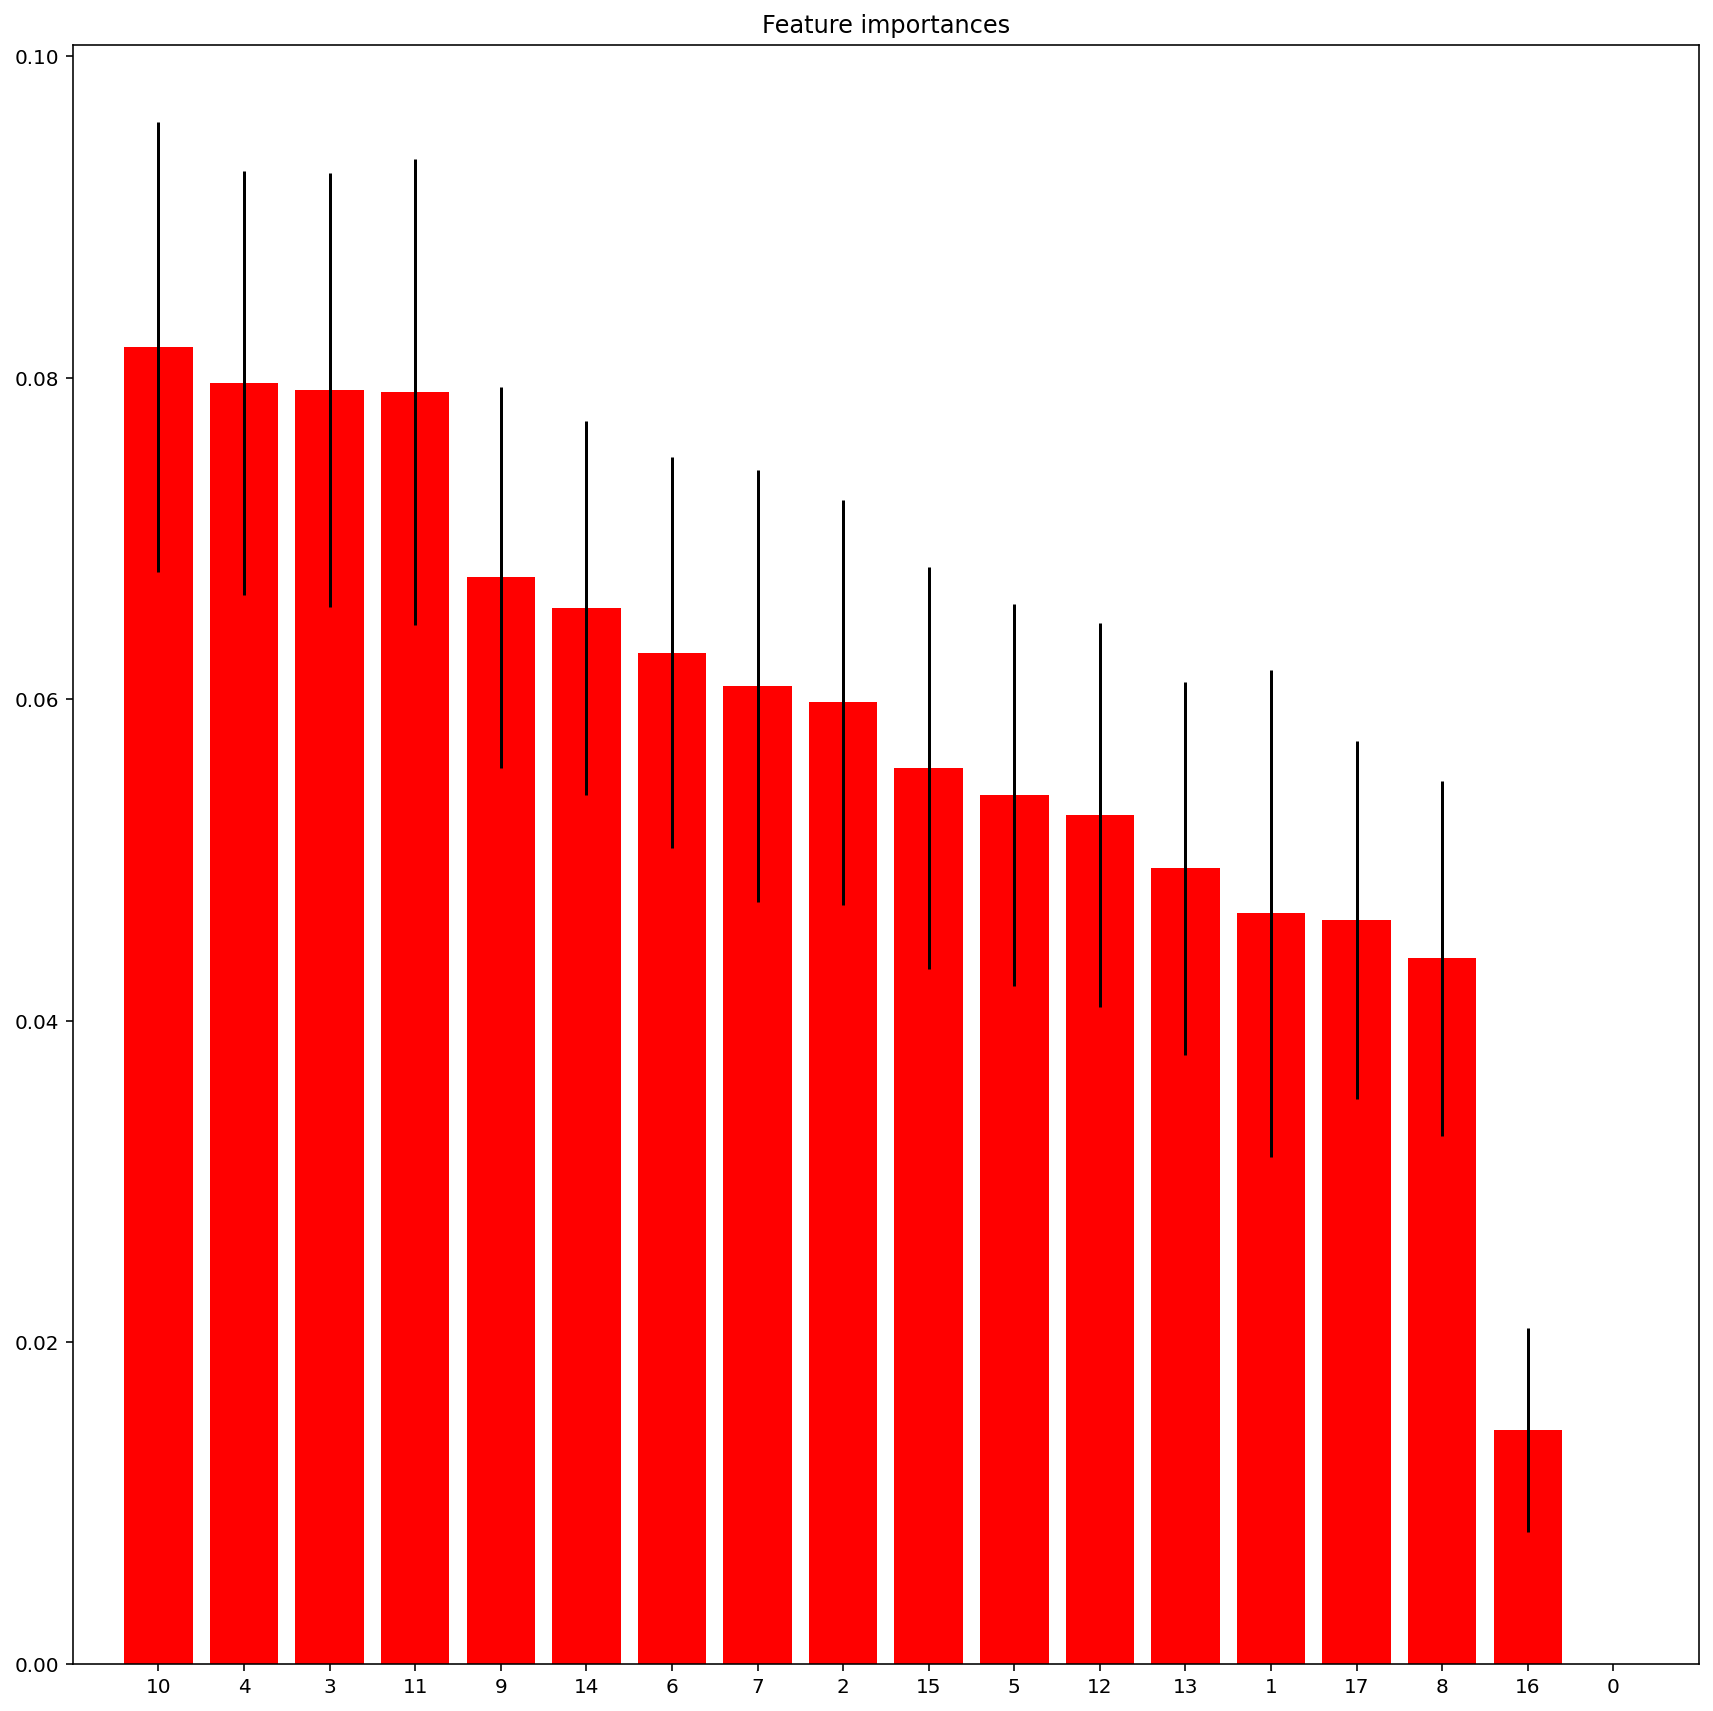

In [56]:
cyp1a2_swiss_feat_imp = plot_swiss_feat_importance(cyp1a2_swiss_feat)

### CYP2d6

In [57]:
cyp2d6_swiss_feat = pd.read_pickle('data/cyp2d6_swiss_feat.pkl')

1. feature 10 (0.082895)
2. feature 3 (0.080551)
3. feature 4 (0.077241)
4. feature 11 (0.076588)
5. feature 9 (0.070624)
6. feature 14 (0.064744)
7. feature 6 (0.062942)
8. feature 7 (0.062117)
9. feature 2 (0.058776)
10. feature 12 (0.056383)
11. feature 5 (0.054266)
12. feature 15 (0.049438)
13. feature 1 (0.049368)
14. feature 13 (0.049242)
15. feature 17 (0.046885)
16. feature 8 (0.044024)
17. feature 16 (0.013916)
18. feature 0 (0.000000)


<Figure size 432x288 with 0 Axes>

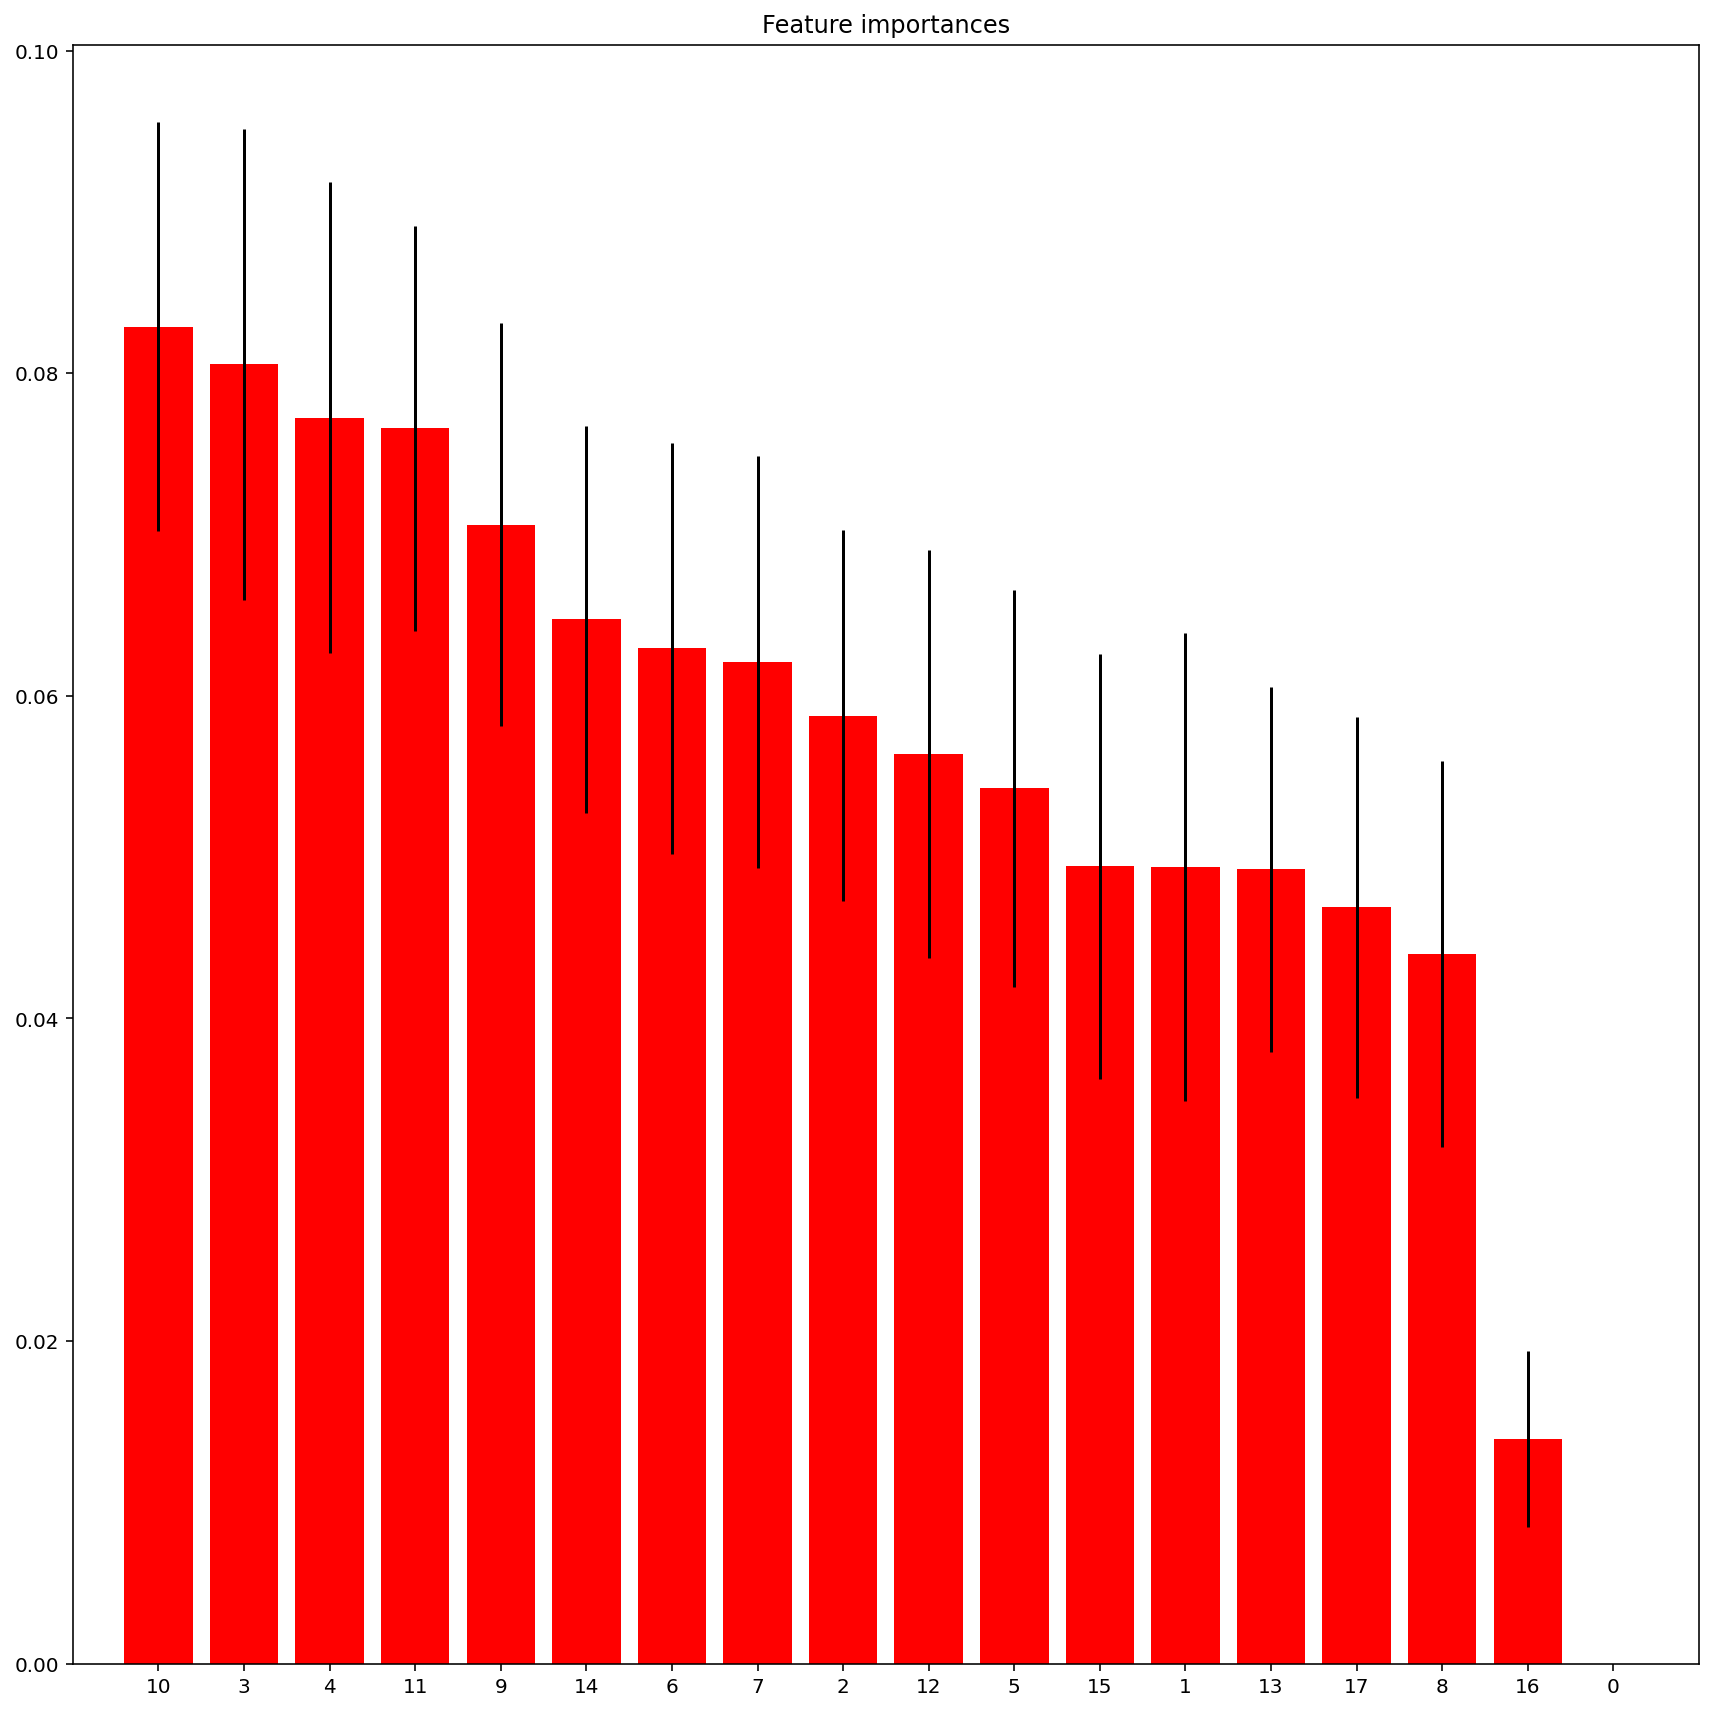

In [58]:
cyp2d6_swiss_feat_imp = plot_swiss_feat_importance(cyp2d6_swiss_feat)

### CYP3a4

In [59]:
cyp3a4_swiss_feat = pd.read_pickle('data/cyp3a4_swiss_feat.pkl')

1. feature 10 (0.081966)
2. feature 3 (0.080693)
3. feature 11 (0.080321)
4. feature 4 (0.077242)
5. feature 9 (0.068729)
6. feature 14 (0.065617)
7. feature 6 (0.062130)
8. feature 2 (0.060666)
9. feature 7 (0.060455)
10. feature 12 (0.055713)
11. feature 15 (0.055617)
12. feature 5 (0.055277)
13. feature 13 (0.047361)
14. feature 1 (0.047316)
15. feature 8 (0.044346)
16. feature 17 (0.044027)
17. feature 16 (0.012525)
18. feature 0 (0.000000)


<Figure size 432x288 with 0 Axes>

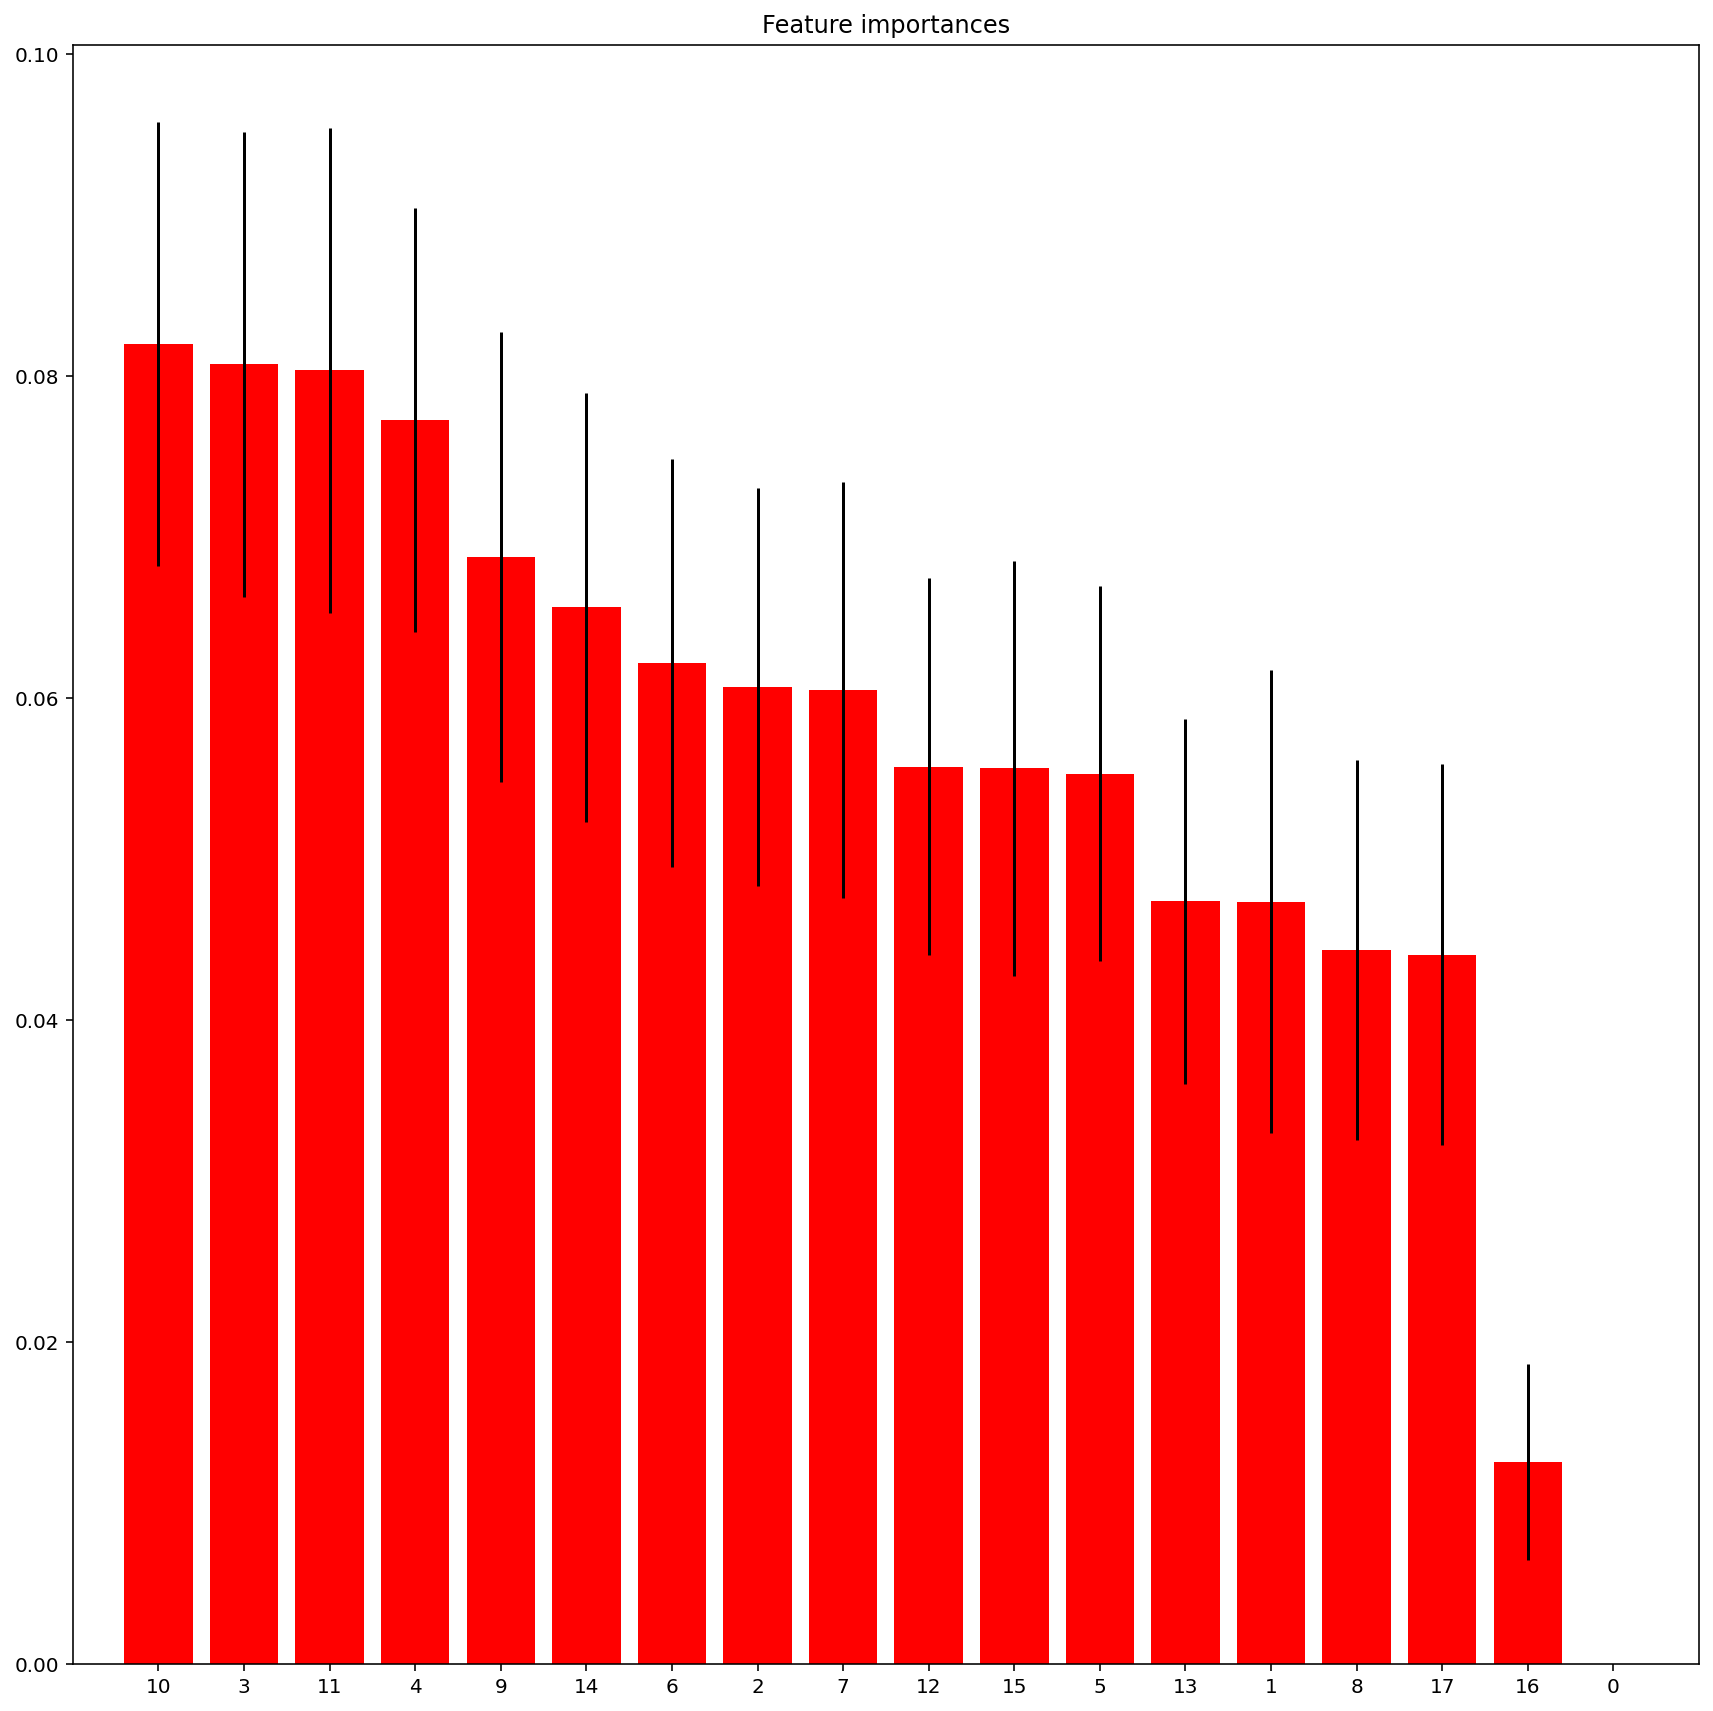

In [60]:
cyp3a4_swiss_feat_imp = plot_swiss_feat_importance(cyp3a4_swiss_feat)

In [61]:
import seaborn as sns

def sns_pair(swiss_feat):
    sns.set_theme(style="whitegrid")

#     # Load the dataset
#     swiss_feat = sns.load_dataset(swiss_feat)

    # Make the PairGrid
    g = sns.PairGrid(swiss_feat.sort_values("index", ascending=False),
                     x_vars=X, y_vars=y,
                     height=10, aspect=.25)

    # Draw a dot plot using the stripplot function
    g.map(sns.stripplot, size=10, orient="h", jitter=False,
          palette="flare_r", linewidth=1, edgecolor="w")

    # Use the same x axis limits on all columns and add better labels
    g.set(xlim=(0, 25), xlabel="Molecule Features", ylabel="")

    # Use semantically meaningful titles for the columns
    titles = ['h_bond_donors', 'h_bond_acceptors', 'molar_refractivity', 'molecular_weight', 'n_atoms','n_carbons',
                 'n_heteroatoms', 'n_rings', 'n_rot_bonds', 'logp', 'tpsa', 'n_heavy_atoms', 'n_aromatic_atom', 
              'single_bond', 'double_bond', 'triple_bond', 'aromatic_bond']

    for ax, title in zip(g.axes.flat, titles):

        # Set a different title for each axes
        ax.set(title=title)

        # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

    sns.despine(left=True, bottom=True)
    return plt.show();

In [63]:
X = cyp2c9_swiss_feat.drop(columns=['index', 'Inhibition Observed'], axis=1)
y = cyp2c9_swiss_feat['Inhibition Observed']

X2 = cyp3a4_swiss_feat.drop(columns=['index', 'Inhibition Observed'], axis=1)
y2 = cyp3a4_swiss_feat['Inhibition Observed']

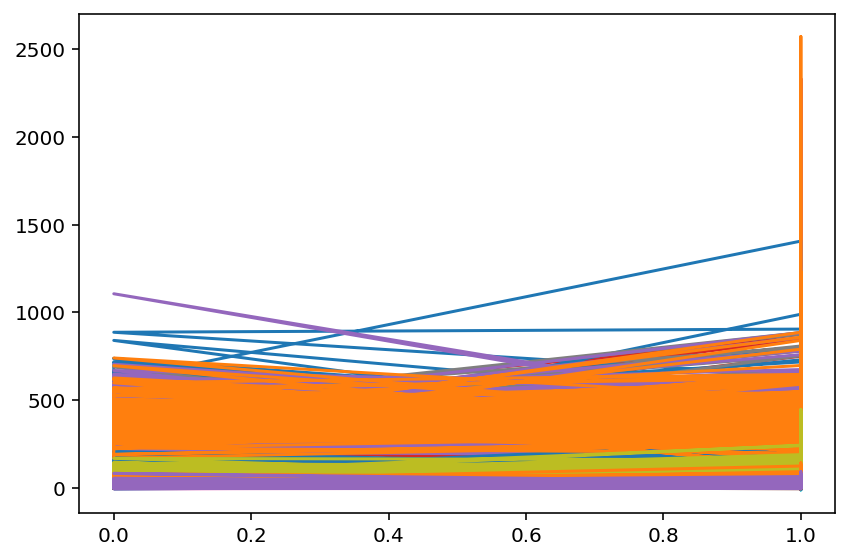

In [65]:
fig = plt.figure()
figsize = (20, 20)
data = ['h_bond_donors', 'h_bond_acceptors', 'molar_refractivity', 'molecular_weight', 'n_atoms','n_carbons',
                 'n_heteroatoms', 'n_rings', 'n_rot_bonds', 'logp', 'tpsa', 'n_heavy_atoms', 'n_aromatic_atom', 
              'single_bond', 'double_bond', 'triple_bond', 'aromatic_bond']

for frame in [cyp2c19_swiss_feat, cyp2c9_swiss_feat, cyp2d6_swiss_feat, cyp3a4_swiss_feat, cyp1a2_swiss_feat]:
    plt.plot(frame['Inhibition Observed'], frame[data])

# plt.xlim(0,18000)
# plt.ylim(0,30)
plt.tight_layout()
plt.show();

In [66]:
from functools import reduce

In [67]:
data_frames = [cyp2c19_swiss_feat, cyp2c9_swiss_feat, cyp2d6_swiss_feat, cyp3a4_swiss_feat, cyp1a2_swiss_feat]

In [69]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['index', 'h_bond_donors', 'h_bond_acceptors', 'molar_refractivity', 'molecular_weight', 'n_atoms','n_carbons',
                 'n_heteroatoms', 'n_rings', 'n_rot_bonds', 'logp', 'tpsa', 'n_heavy_atoms', 'n_aromatic_atom', 
              'single_bond', 'double_bond', 'triple_bond', 'aromatic_bond', 'Inhibition Observed'], how='left'), data_frames)


In [70]:
pd.DataFrame.to_csv(df_merged, 'merged.txt', sep=',', na_rep='.', index=False)

In [71]:
df_merged.head()

,index,Inhibition Observed,h_bond_donors,h_bond_acceptors,molar_refractivity,molecular_weight,n_atoms,n_carbons,n_heteroatoms,n_rings,...,n_heavy_atoms,n_aromatic_atom,single_bond,double_bond,triple_bond,aromatic_bond,Panel Name_x,Panel Name_y,Panel Name_x,Panel Name_y
0,5,1,1.0,4.0,70.5419,253.113650,17.0,13.0,4.0,2.0,...,17.0,5.0,24.0,2.0,0.0,10.0,NaN,NaN,NaN,NaN
1,10,1,0.0,4.0,87.3980,315.059696,21.0,16.0,5.0,3.0,...,21.0,17.0,12.0,0.0,0.0,34.0,NaN,NaN,NaN,NaN
2,15,1,1.0,2.0,61.9434,297.960311,14.0,10.0,4.0,1.0,...,14.0,6.0,10.0,4.0,2.0,12.0,NaN,NaN,NaN,NaN
3,20,1,2.0,5.0,54.6820,222.075290,16.0,9.0,7.0,2.0,...,16.0,9.0,10.0,4.0,0.0,20.0,NaN,NaN,NaN,NaN
4,25,1,1.0,2.0,72.1642,295.082013,21.0,15.0,6.0,2.0,...,21.0,12.0,18.0,2.0,0.0,24.0,NaN,NaN,NaN,NaN


In [72]:
feature_df_merged = pd.read_csv('data/feature_df_merged.csv')

In [73]:
feature_df_merged.head()

,index,h_bond_donors,h_bond_acceptors,molar_refractivity,molecular_weight,n_atoms,n_carbons,n_heteroatoms,n_rings,n_rot_bonds,logp,tpsa,n_heavy_atoms,n_aromatic_atom,single_bond,double_bond,triple_bond,aromatic_bond,Inhibition Observed,Panel Name
0,0,1.0,4.0,70.4422,306.995639,18.0,12.0,6.0,2.0,3.0,2.50942,67.49,18.0,11.0,12.0,4.0,0.0,22.0,1,0
1,1,1.0,4.0,85.0662,290.116761,22.0,17.0,5.0,3.0,4.0,2.63620,59.28,22.0,17.0,10.0,4.0,0.0,34.0,1,2
2,2,1.0,3.0,85.8431,298.131742,22.0,17.0,5.0,2.0,6.0,3.86462,72.24,22.0,12.0,18.0,4.0,0.0,24.0,1,4
3,3,1.0,1.0,59.1017,209.121592,15.0,12.0,3.0,1.0,4.0,3.20040,29.10,15.0,6.0,16.0,2.0,0.0,12.0,1,3
4,4,1.0,5.0,72.2607,269.080041,20.0,14.0,6.0,3.0,3.0,1.85720,73.34,20.0,12.0,16.0,4.0,0.0,24.0,1,1


In [81]:
X = feature_df_merged.drop(columns=['index', 'Inhibition Observed'], axis=1)
y = feature_df_merged['Inhibition Observed']

In [83]:
X.head()

,h_bond_donors,h_bond_acceptors,molar_refractivity,molecular_weight,n_atoms,n_carbons,n_heteroatoms,n_rings,n_rot_bonds,logp,tpsa,n_heavy_atoms,n_aromatic_atom,single_bond,double_bond,triple_bond,aromatic_bond,Panel Name
0,1.0,4.0,70.4422,306.995639,18.0,12.0,6.0,2.0,3.0,2.50942,67.49,18.0,11.0,12.0,4.0,0.0,22.0,0
1,1.0,4.0,85.0662,290.116761,22.0,17.0,5.0,3.0,4.0,2.63620,59.28,22.0,17.0,10.0,4.0,0.0,34.0,2
2,1.0,3.0,85.8431,298.131742,22.0,17.0,5.0,2.0,6.0,3.86462,72.24,22.0,12.0,18.0,4.0,0.0,24.0,4
3,1.0,1.0,59.1017,209.121592,15.0,12.0,3.0,1.0,4.0,3.20040,29.10,15.0,6.0,16.0,2.0,0.0,12.0,3
4,1.0,5.0,72.2607,269.080041,20.0,14.0,6.0,3.0,3.0,1.85720,73.34,20.0,12.0,16.0,4.0,0.0,24.0,1


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [86]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit(X_train)
X_test = ss.transform(X_test)

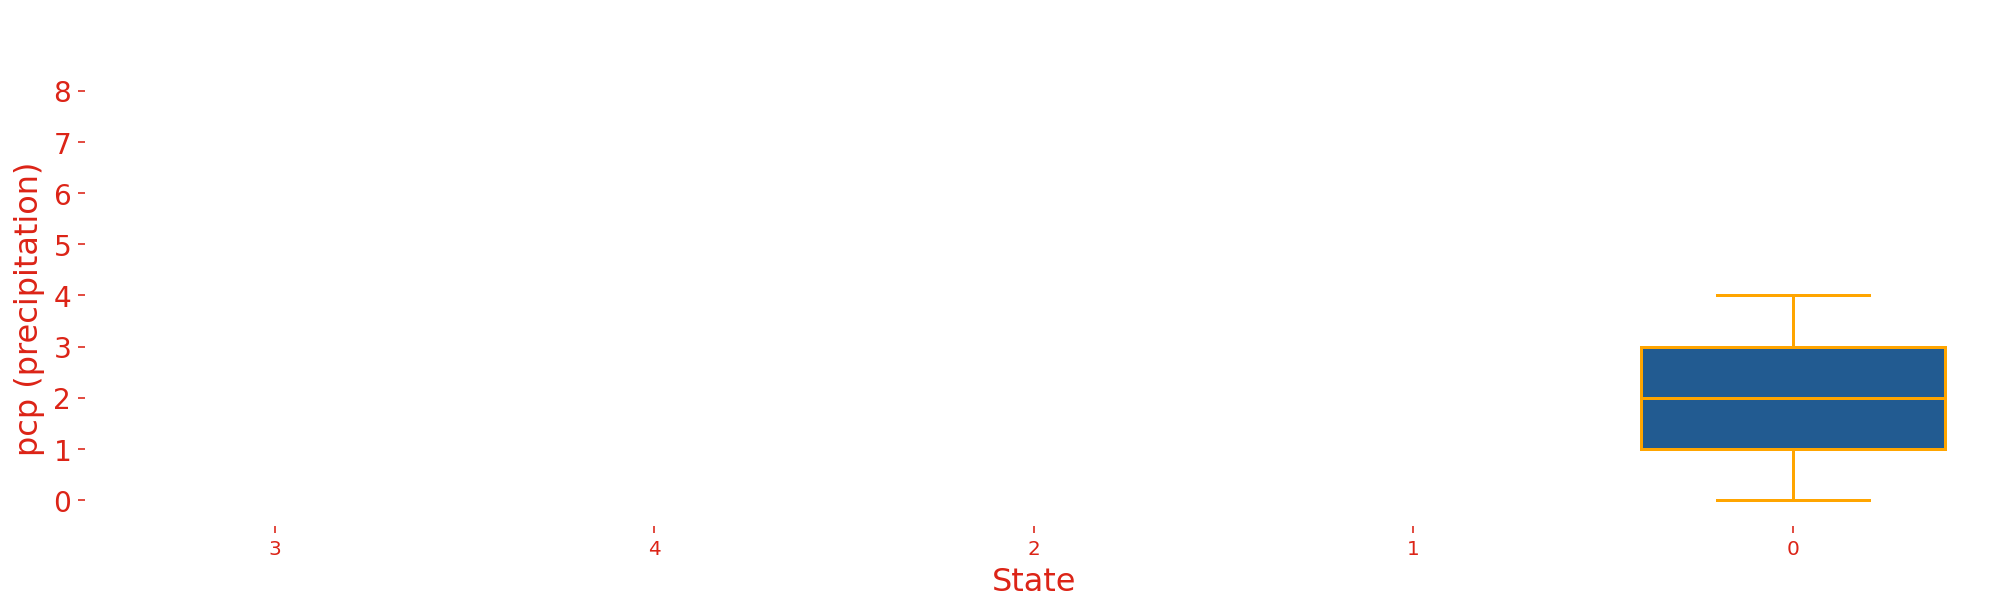

In [87]:
df = pd.DataFrame(feature_df_merged.groupby('Panel Name')['aromatic_bond'].mean().T).sort_values('aromatic_bond').index


plt.figure(figsize = (17,4))
sns.boxplot(data = feature_df_merged, x = 'aromatic_bond', y = 'Panel Name', 
            palette = 'Blues', 
            order = df,
            boxprops=dict(edgecolor='orange'),
            capprops=dict(color='orange'), 
            whiskerprops=dict(color='orange'), 
            flierprops=dict(color='orange', markeredgecolor='orange'),
            medianprops=dict(color='orange'))

plt.title('Precipitation Index by State', fontsize=24, color='white', pad=20)
plt.xlabel('State', fontsize=16, color='#dc2417')
plt.ylabel('pcp (precipitation)', fontsize=16, color='#dc2417')
plt.xticks(fontsize=10, color='#dc2417')
plt.yticks(fontsize=14, color='#dc2417')
plt.tick_params(color='#dc2417')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.ylim(-0.5, 8.0);

# plt.savefig('./visuals/pcp_by_state.png', transparent=True);

In [88]:
cols.head()

NameError: name 'cols' is not defined

1. feature 9 (0.082782)
2. feature 2 (0.079628)
3. feature 3 (0.078477)
4. feature 10 (0.077439)
5. feature 8 (0.066489)
6. feature 17 (0.064199)
7. feature 13 (0.061343)
8. feature 1 (0.058448)
9. feature 5 (0.058186)
10. feature 6 (0.055726)
11. feature 14 (0.049745)
12. feature 4 (0.048095)
13. feature 11 (0.047064)
14. feature 0 (0.046111)
15. feature 12 (0.040910)
16. feature 16 (0.036863)
17. feature 7 (0.035159)
18. feature 15 (0.013336)


<Figure size 432x288 with 0 Axes>

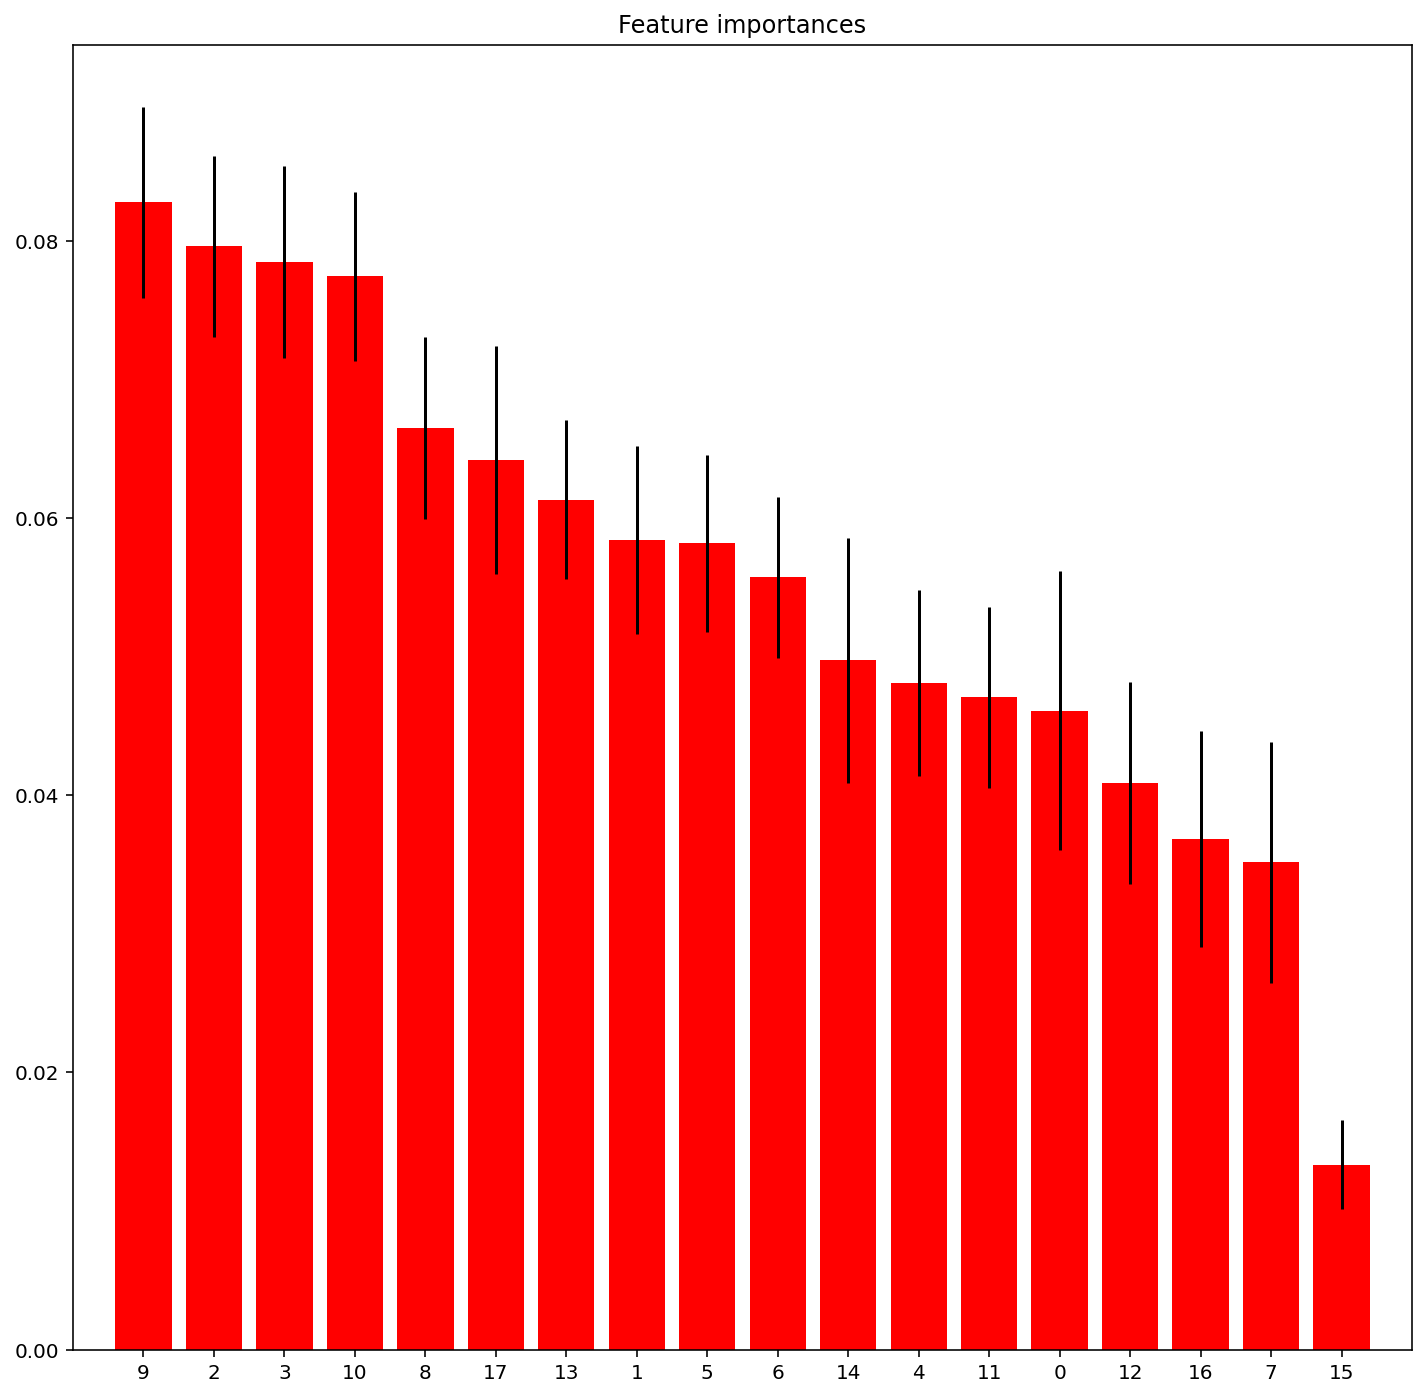

In [89]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

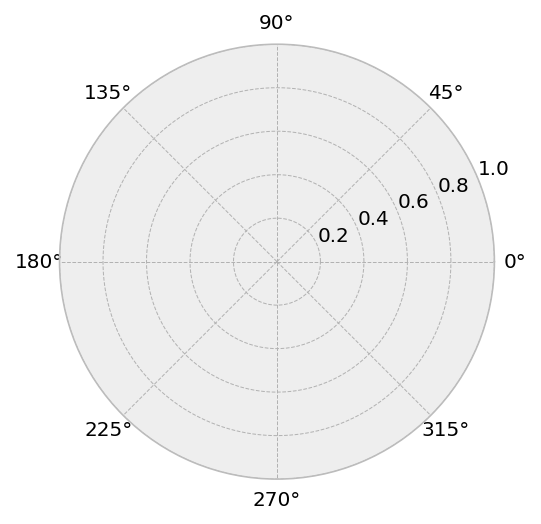

In [95]:
# Fixing random state for reproducibility

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = X
width = y
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

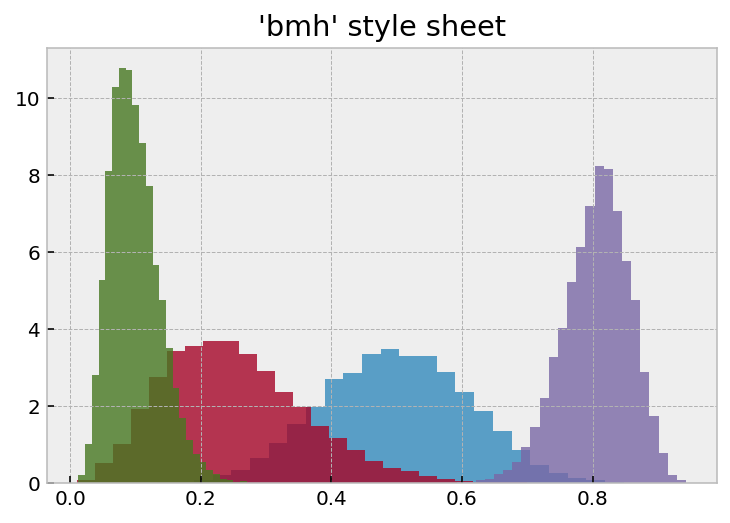

In [91]:
# Fixing random state for reproducibility

plt.style.use('bmh')


def plot_beta_hist(ax, a, b):
    ax.hist(np.random.beta(a, b, size=10000),
            histtype="stepfilled", bins=25, alpha=0.8, density=True)


fig, ax = plt.subplots()
plot_beta_hist(ax, 10, 10)
plot_beta_hist(ax, 4, 12)
plot_beta_hist(ax, 50, 12)
plot_beta_hist(ax, 6, 55)
ax.set_title("'bmh' style sheet")

plt.show()